Ben Ghertner 2025

Generates plots showing the scale of various parameters (including skew-T plots) in the Boussinesq Theory including:

    - Figure 2.1
    - Figure 2.2 
    - Figure 2.3
    - Figure 2.4
    - Figure 2.5
    - Figure 2.6
    - Figure 2.7


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
#plt.rcParams['font.serif'] = ['Computer Modern Roman']

%matplotlib inline

In [2]:
Rd  = 287.0
Rv  = 461.5
cpd = 1006.
cpv = 1870.
cpl = 4190.

lv = lambda T: 2.501e6 + (cpl - cpv)*(T - 273.15)

def rstar(p,T):
    estar = 611.2 * np.exp( 17.67 * ( T  - 273.15 ) / ( T  - 29.65 ) )
    return Rd/Rv*estar/(p-estar)

RT  = lambda rT: Rd  + rT*Rv
cpT = lambda rT: cpd + rT*cpv

lambda_R = lambda T: lv(T)/Rv/T
lambda_c = lambda T, rT: lv(T)/cpT(rT)/T

Figure 2.2

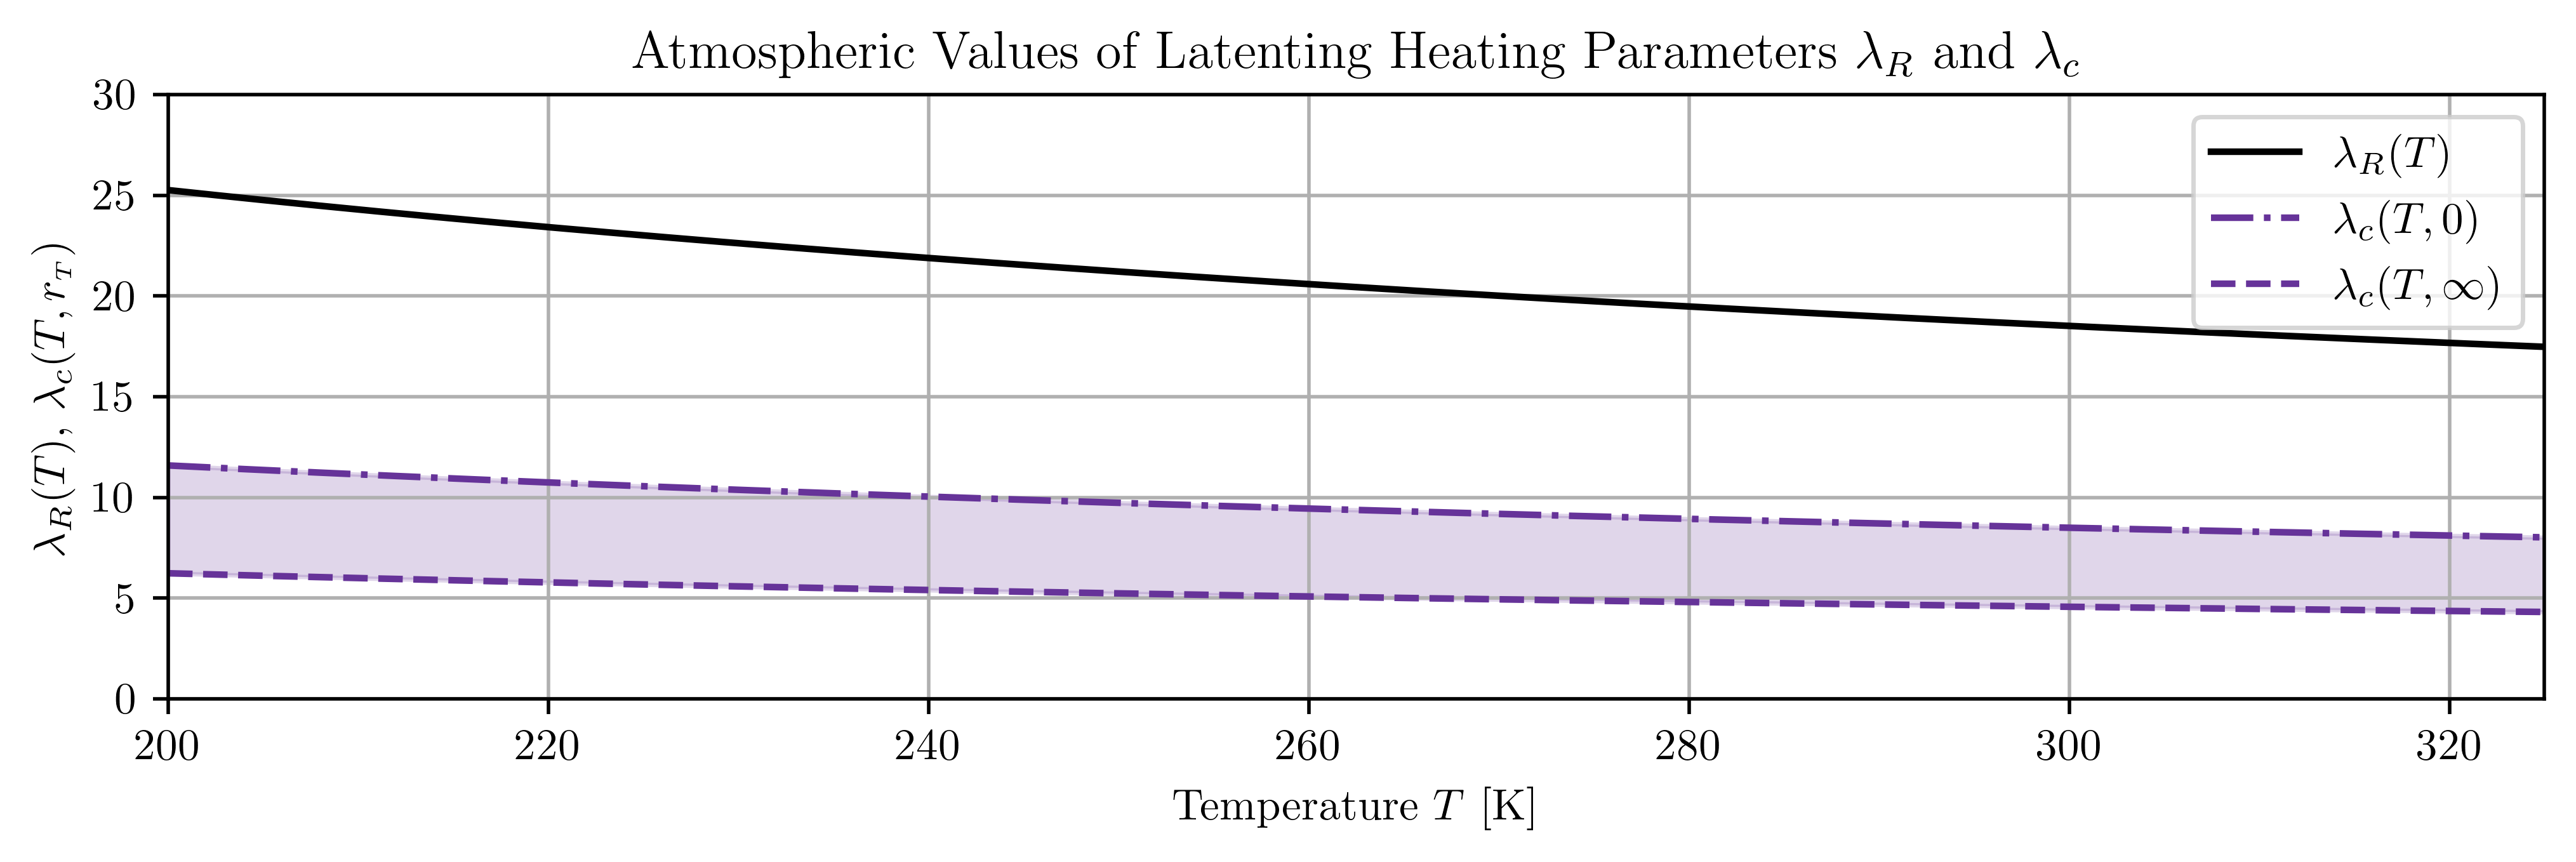

In [3]:
#lambda_R and lambda_c over a range of atmospheric temperatures

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(8,2.6)
fig.set_dpi(500)

# temperature range
TT = np.linspace(200, 325, num=250)

ax.plot(TT, lambda_R(TT), 'k', label=r'$\lambda_R(T)$')
ax.plot(TT, lv(TT)/cpd/TT, color='rebeccapurple', linestyle='dashdot', label=r'$\lambda_c(T,0)$')
ax.plot(TT, lv(TT)/cpv/TT, color='rebeccapurple', linestyle='--', label=r'$\lambda_c(T,\infty)$')
ax.fill_between(TT, lv(TT)/cpv/TT, lv(TT)/cpd/TT, color='rebeccapurple', alpha=0.2)
ax.grid()
ax.legend(loc='upper right')
ax.set(xlim=(TT[0], TT[-1]), ylim=(0,30))
ax.set(title=r'Atmospheric Values of Latenting Heating Parameters $\lambda_R$ and $\lambda_c$',
       xlabel=r'Temperature $T$ [K]',
       ylabel=r'$\lambda_R(T)$, $\lambda_c(T,r_{\scriptscriptstyle T})$')

plt.show()

Figure 2.6

-0.7407659410113563


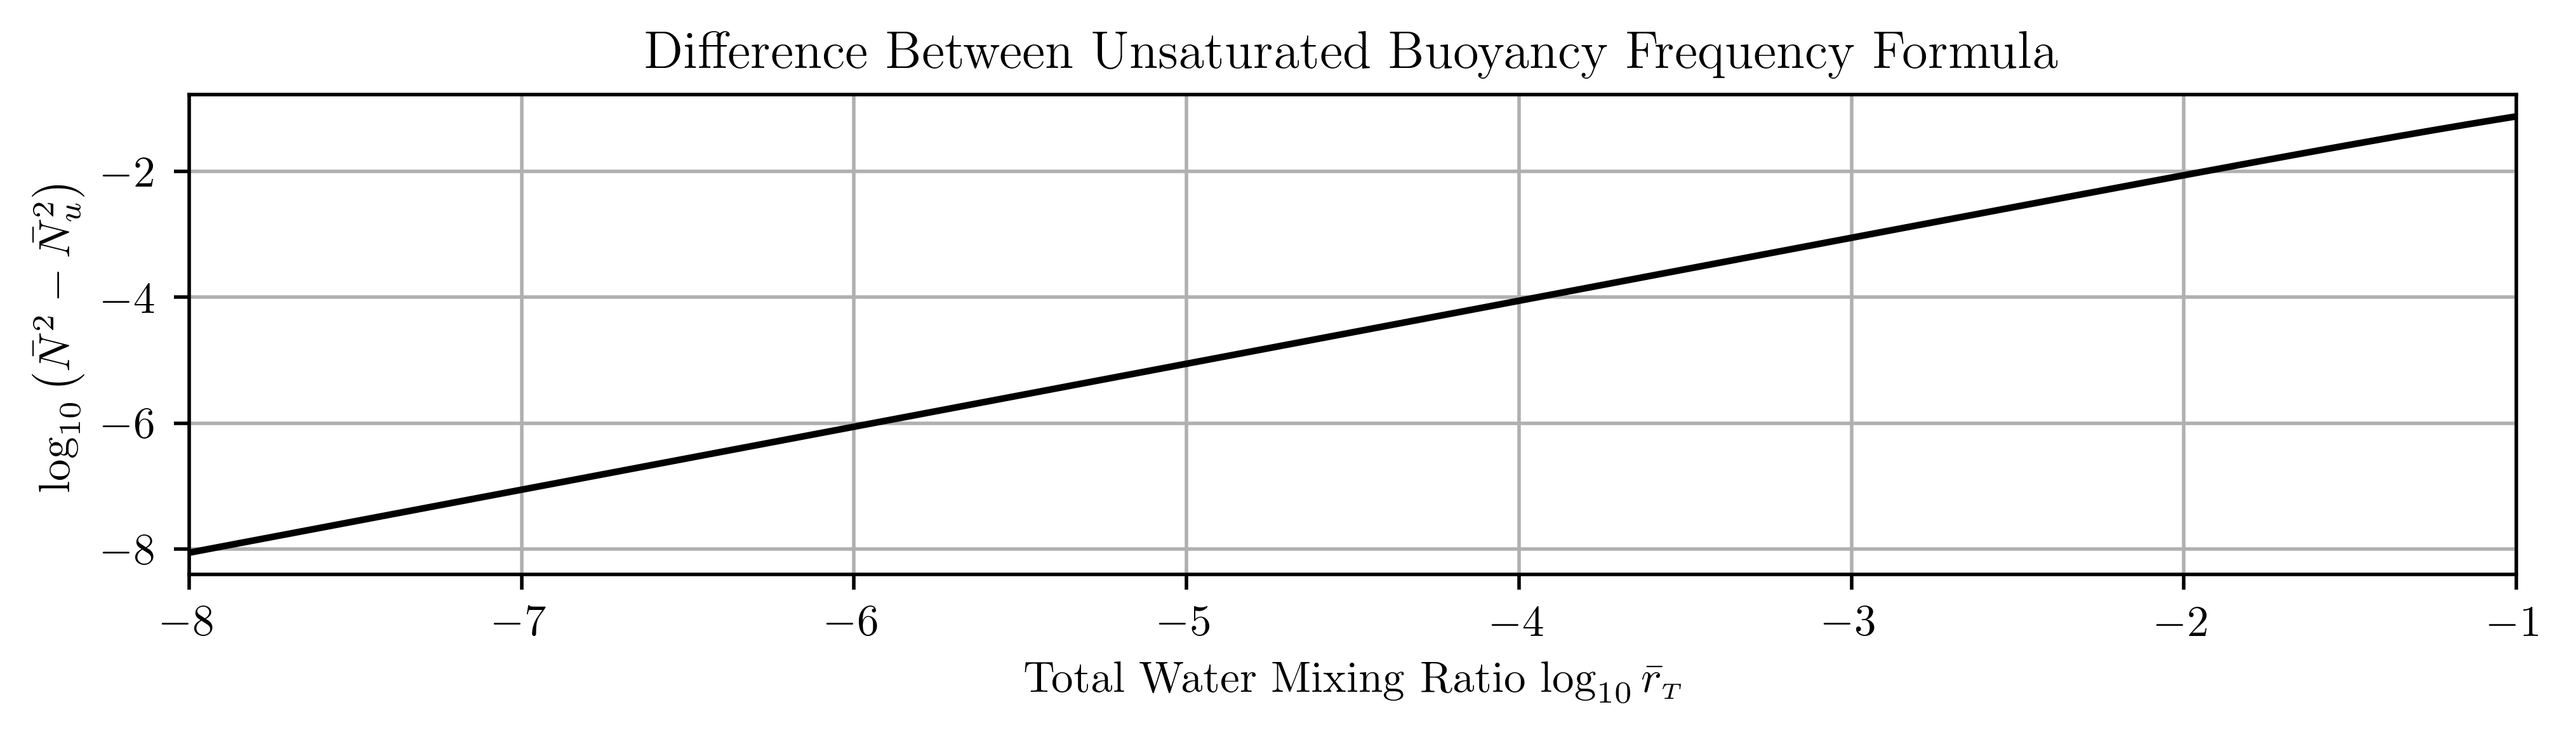

In [4]:
#Difference in N2u and N2

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(8,2.2)
fig.set_dpi(500)

N20 = 1e-4
T0  = 273.15
g   = 9.81

# mixing ratio range
rr = 10**np.linspace(-8, -1, num=250)

ax.plot(np.log10(rr), np.log10(-g**2/N20/(Rd*T0)*(cpd*Rv - cpv*Rd)/(cpd*cpT(rr))*rr), 'k')
print(g**2/N20/(Rd*T0)*(cpd*Rv - cpv*Rd)/(cpd*cpT(0.1)))
ax.grid()
ax.set(xlim=(-8, -1))
ax.set(title=r'Difference Between Unsaturated Buoyancy Frequency Formula',
       xlabel=r'Total Water Mixing Ratio $\log_{10}\bar{r}_{\scriptscriptstyle T}$',
       ylabel=r'$\log_{10}\left(\bar{N}^2 - \bar{N}^2_u\right)$')

plt.show()

Figure 2.1

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0


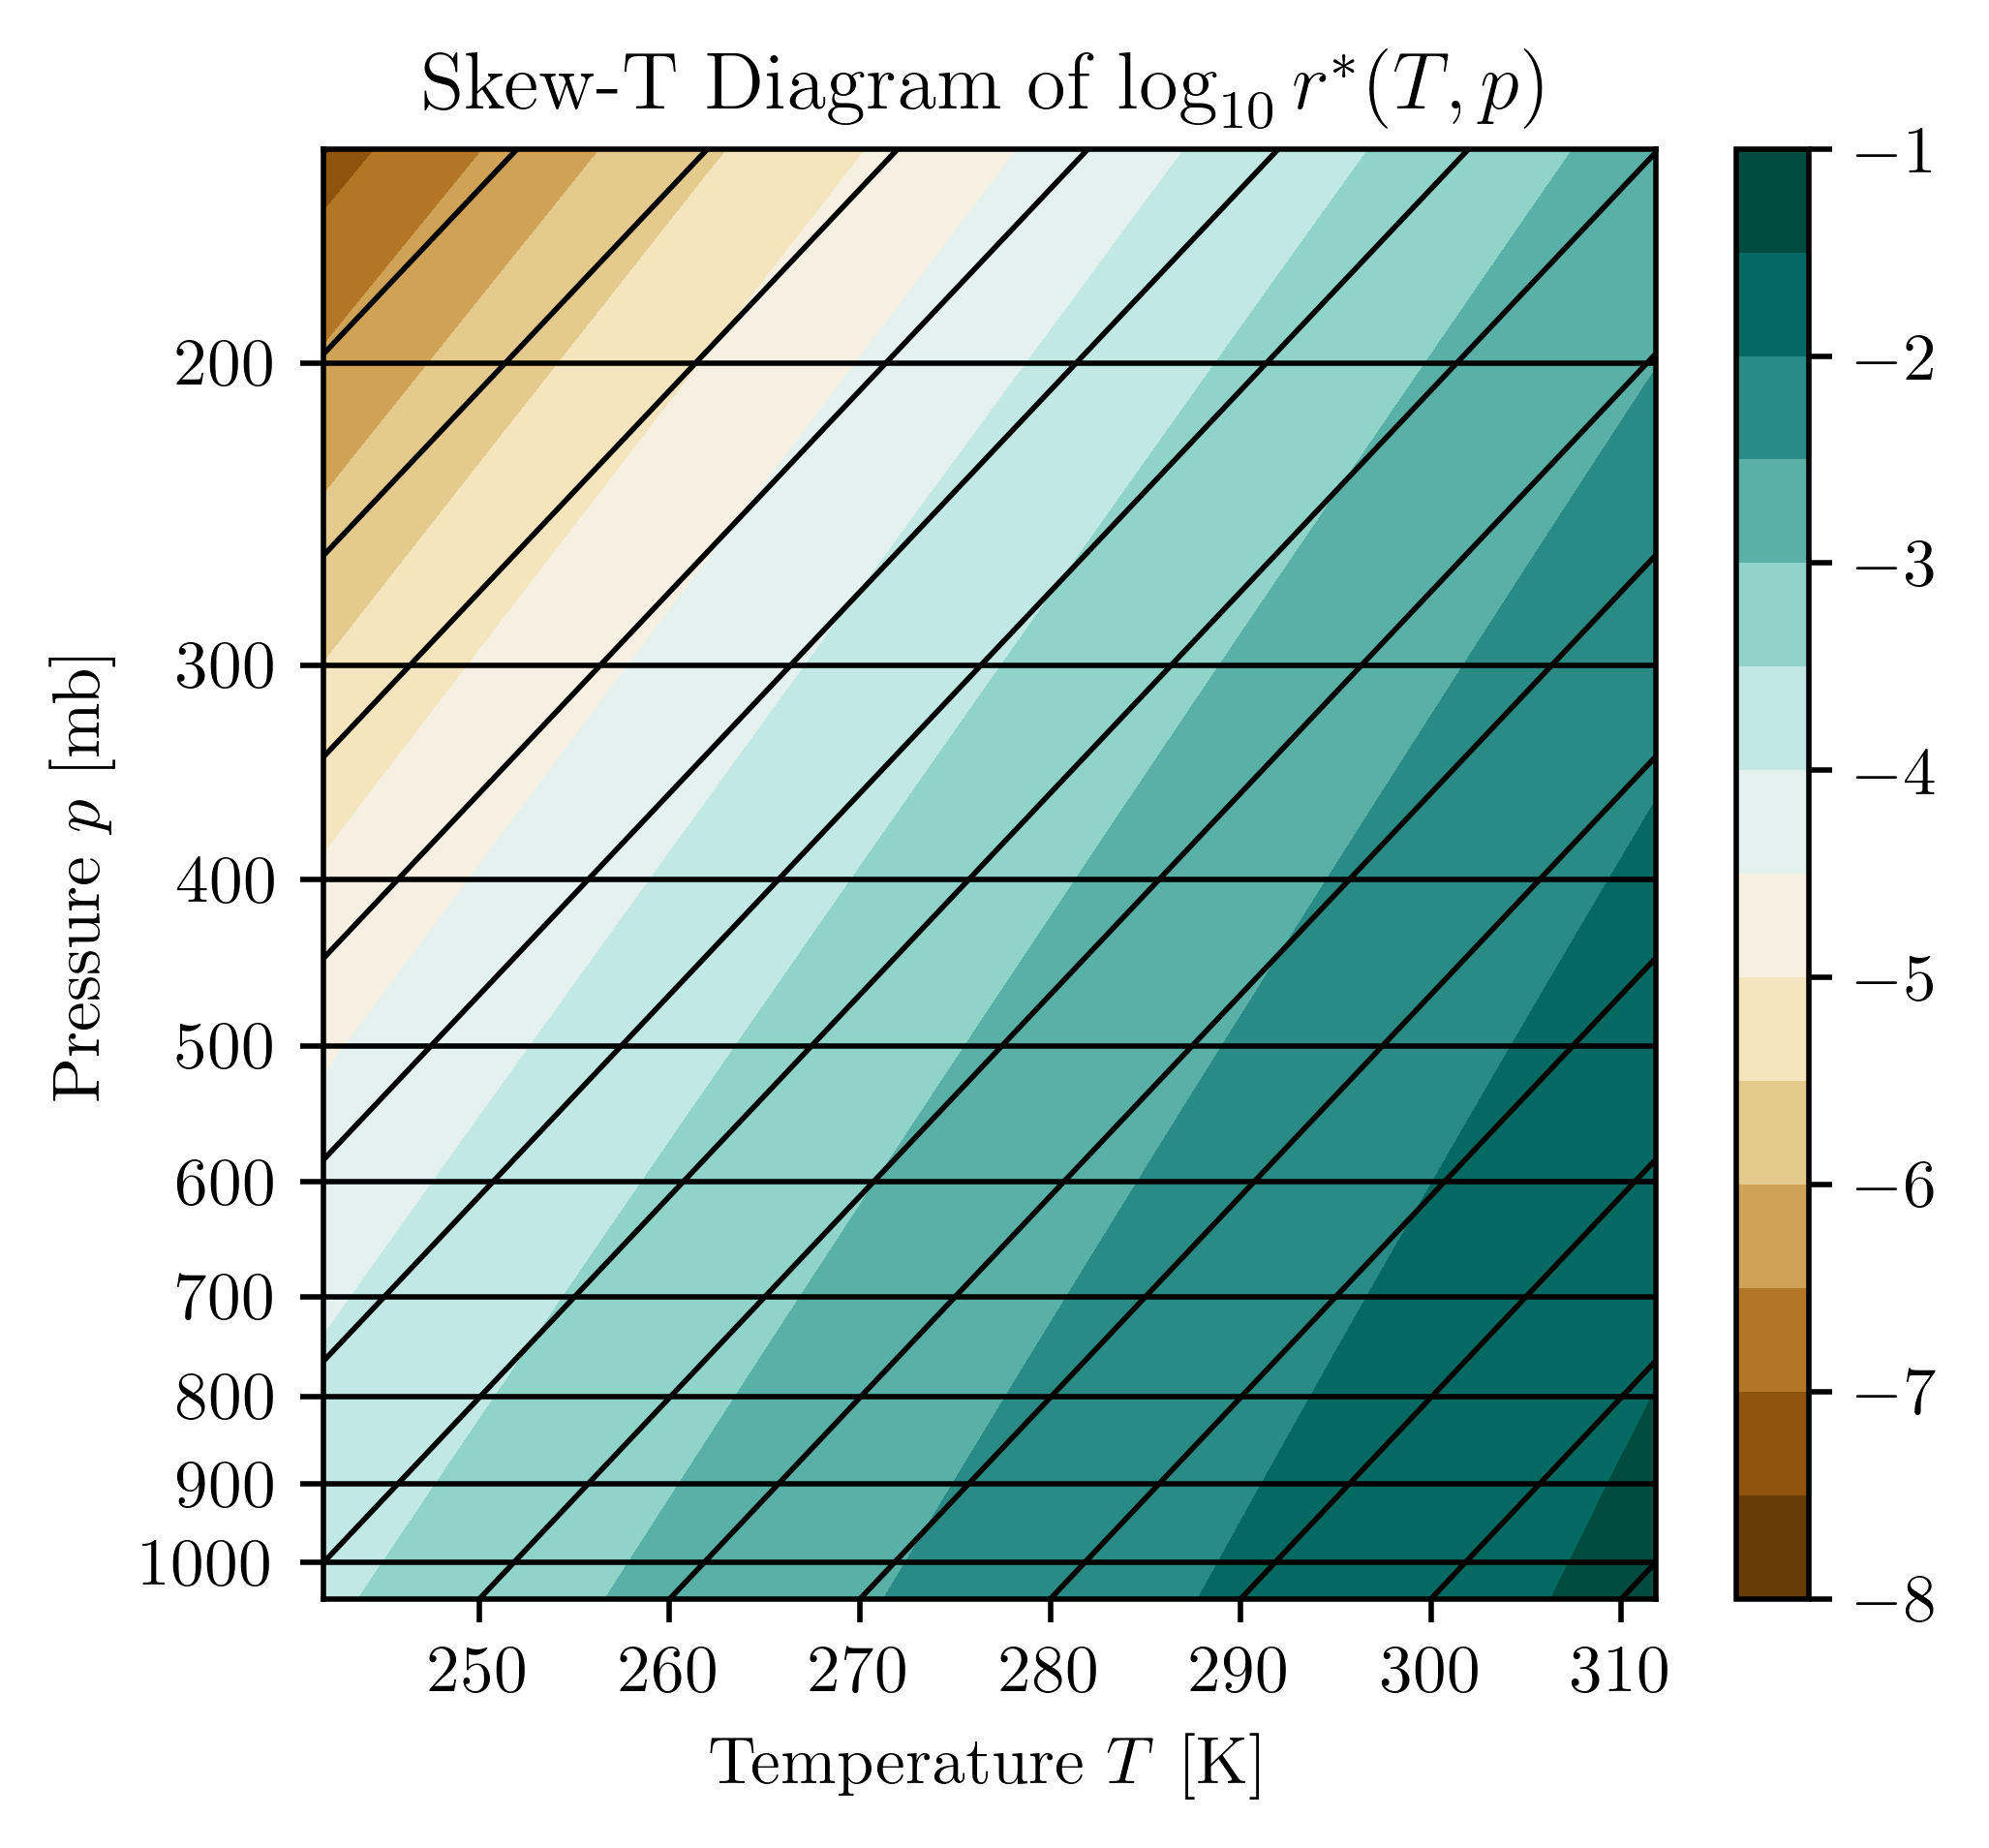

In [5]:

#r^* plot

p_top = 150.0         # hPa (top of plot)
p_bot = 1050.0        # hPa (bottom of plot)
p0    = 1000.0        # hPa reference level for labeling temperature ticks
p00   = 1e5
Tmin, Tmax = 240., 310.  # k range for isotherm labels at p0
dT_iso = 10.0         # k spacing for isotherms
skew = -37         # K per ln(hPa) -> controls the skew angle

# ----------------------------
# Coordinate transforms
# ----------------------------
def x_from_Tp(T_c, p_hpa, skew=skew, p_ref=p0):
    """Map physical (T[°C], p[hPa]) to plot x."""
    return T_c + skew * np.log(p_hpa / p_ref)

def T_from_xp(x, p_hpa, skew=skew, p_ref=p0):
    """Inverse map: plot (x, p[hPa]) to physical T[°C]."""
    return x - skew * np.log(p_hpa / p_ref)


fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(4,3.7)
fig.set_dpi(500)

ax.set_ylim(np.log(p_bot), np.log(p_top))
ax.set_ylabel(r'Pressure $p$ [mb]')

# The x-axis will be the skewed temperature coordinate.
ax.set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    ax.hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

ax.set_yticks(np.log(iso_p_levels))
ax.set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    ax.plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{int(T)}" for T in T_ticks])
ax.set_xlabel(r"Temperature $T$ [K]")
ax.set_title(r'Skew-T Diagram of $\log_{10} r^*(T,p)$')
#ax.tick_params(axis="x", bottom=False)

ax.grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

cont = ax.contourf(xx, np.log(pp), np.log10(rstar(pp*100, TT)), cmap='BrBG', levels=np.arange(-8.,-0.9,0.5))
fig.colorbar(cont, ticks=[j for j in range(-8,0)])

plt.show()


Figure 2.3

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
0.864936545453681
0.7147164135623777
0.7175977008324853
0.7147117336043821


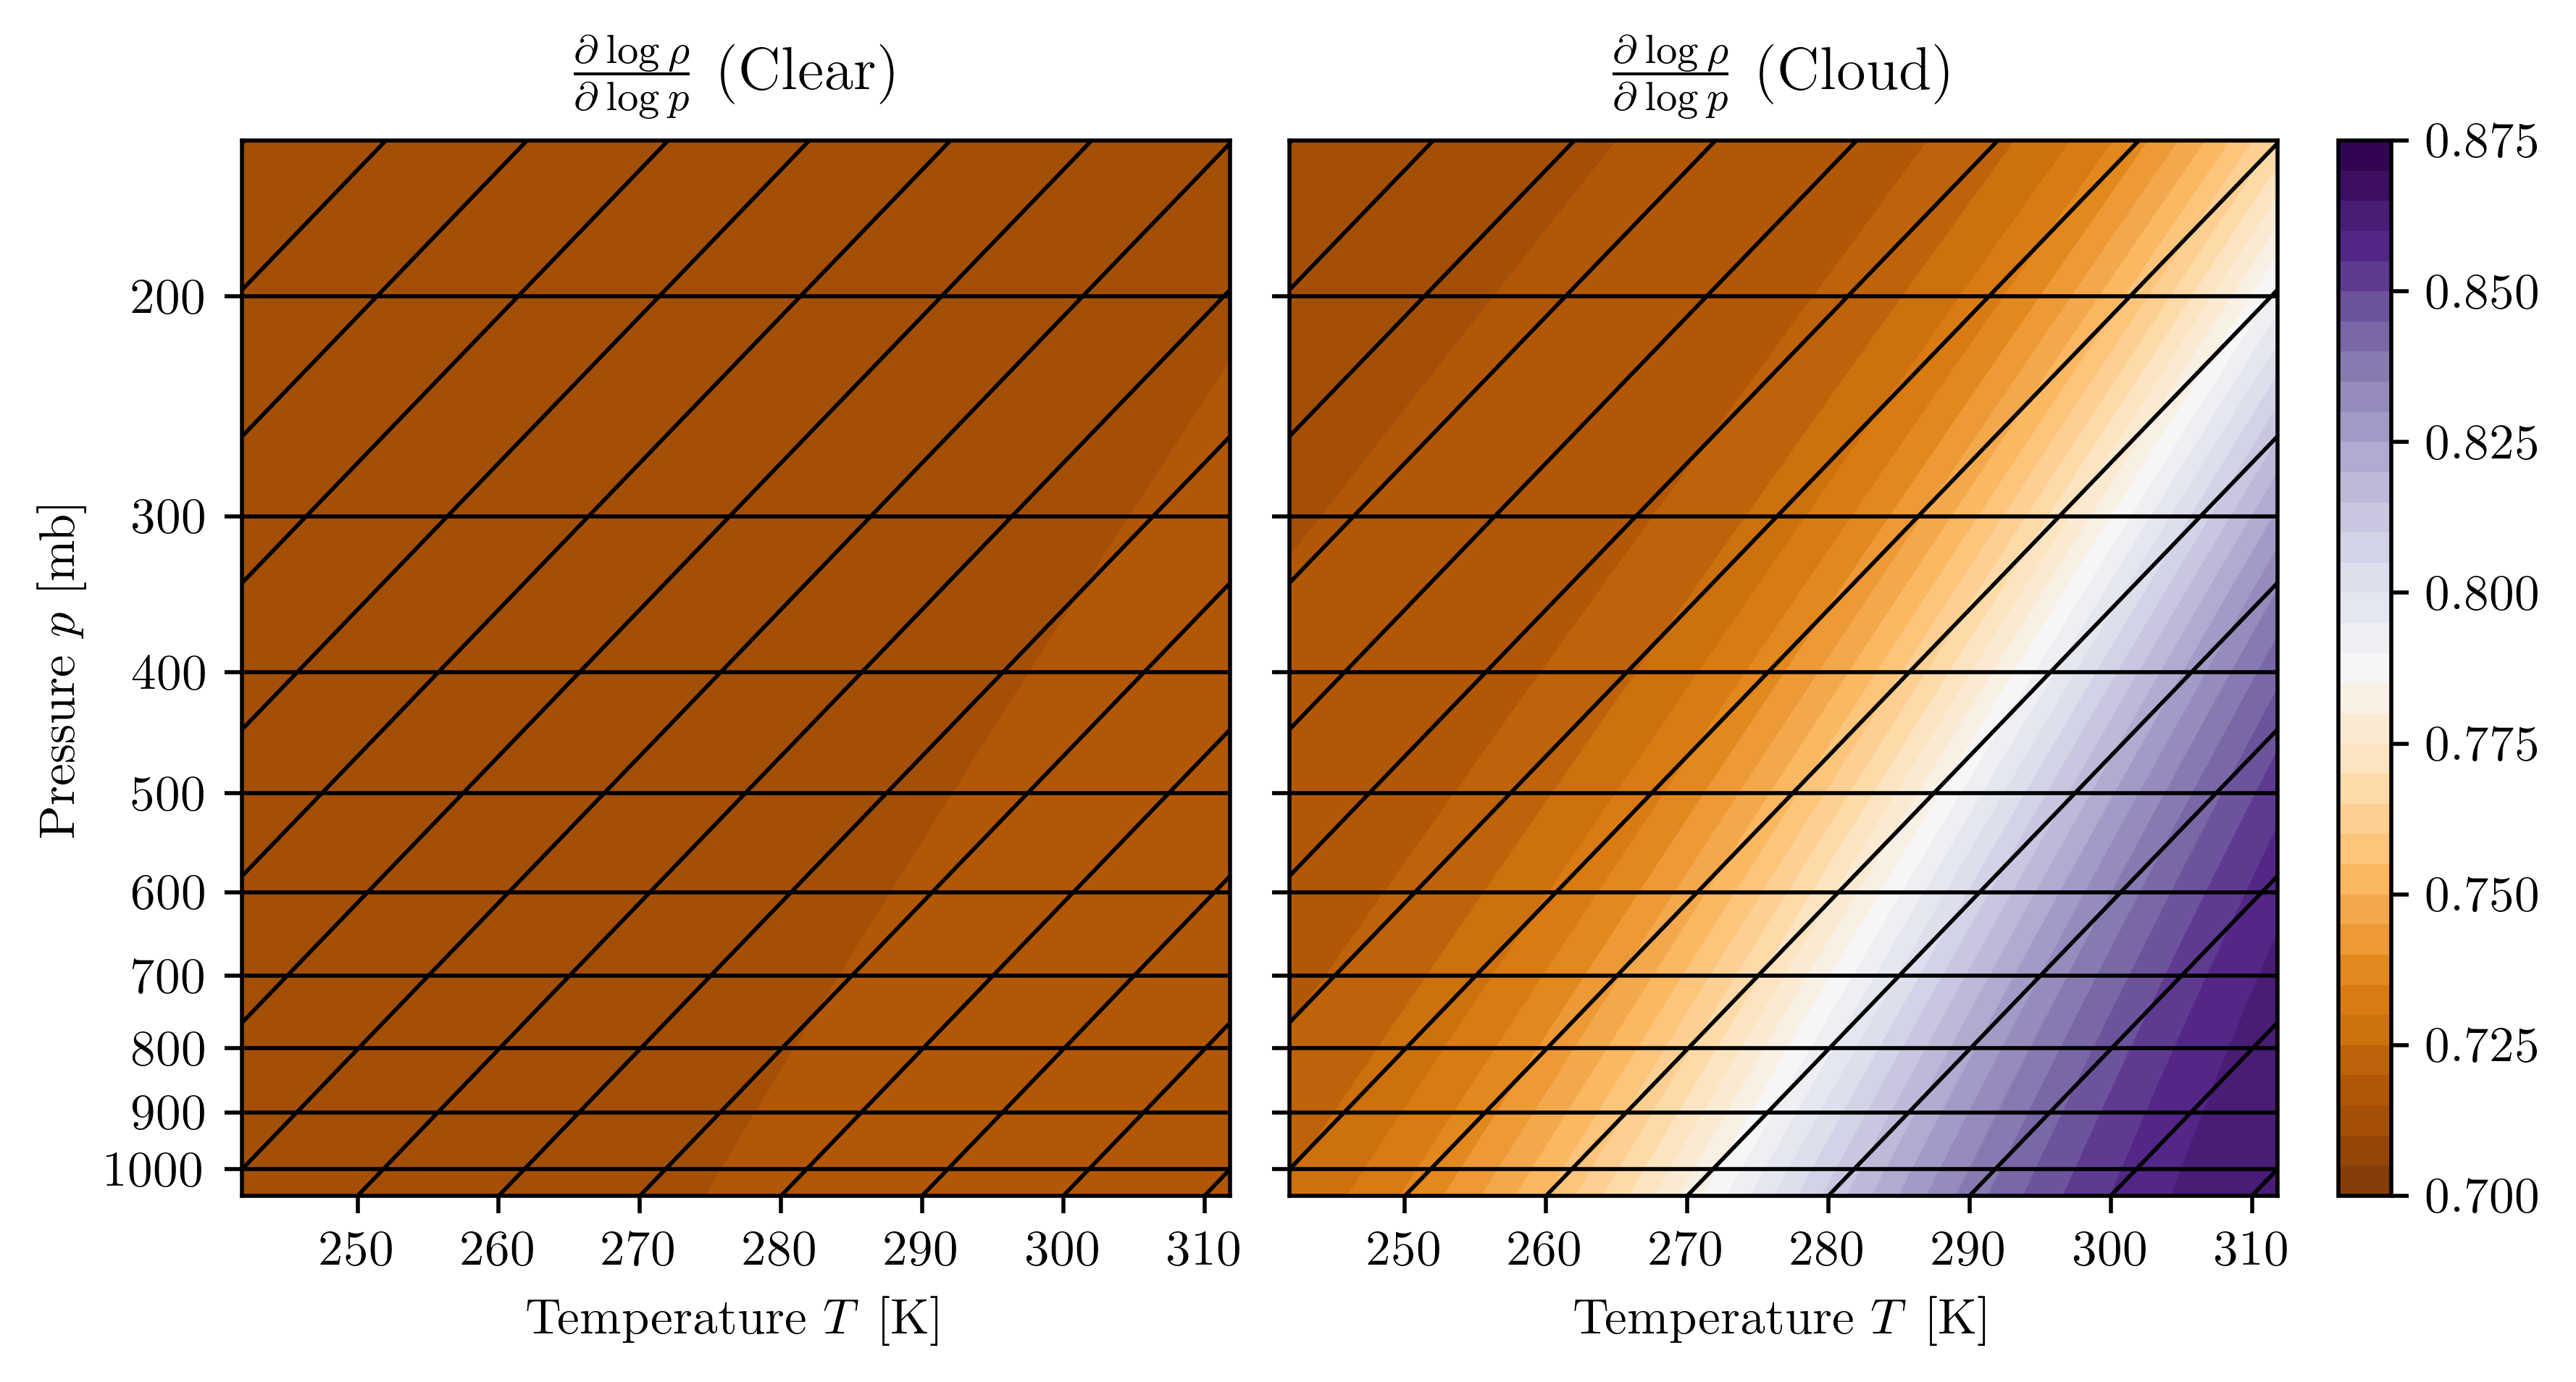

In [6]:
## dlog rho/ dlog p - plot

def dlogrho_dlogp_clear(p, T):
    rs = rstar(p,T)
    return 1 - RT(rs)/cpT(rs)

def dlogrho_dlogp_cloud(p, T):
    rs = rstar(p,T)
    drl_dlogp = -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(RT(rs)/cpT(rs)*lambda_R(T)-1)
    return 1 - RT(rs)/cpT(rs) - drl_dlogp*(lambda_c(T,rs)-Rv/RT(rs))

fig, axes = plt.subplots(layout='constrained', ncols=2, sharey=True)
fig.set_size_inches(7,3.7)
fig.set_dpi(500)

axes[0].set_ylim(np.log(p_bot), np.log(p_top))
axes[0].set_ylabel(r'Pressure $p$ [mb]')

# The x-axis will be the skewed temperature coordinate.
axes[0].set_xlim(Tmin, Tmax)
axes[1].set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    axes[0].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[1].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

axes[0].set_yticks(np.log(iso_p_levels))
axes[0].set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    axes[0].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[1].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)

axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[0].set_xlabel(r"Temperature $T$ [K]")

axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[1].set_xlabel(r"Temperature $T$ [K]")

axes[0].set_title(r'$\frac{\partial \log \rho}{\partial \log p}$ (Clear)', pad=10)
axes[1].set_title(r'$\frac{\partial \log \rho}{\partial \log p}$ (Cloud)', pad=10)
#ax.tick_params(axis="x", bottom=False)

axes[0].grid(False)
axes[1].grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

axes[0].contourf(       xx, np.log(pp), dlogrho_dlogp_clear(pp*100, TT), cmap='PuOr', levels=np.arange(0.7,0.875,0.005))
cont = axes[1].contourf(xx, np.log(pp), dlogrho_dlogp_cloud(pp*100, TT), cmap='PuOr', levels=np.arange(0.7,0.875,0.005))
fig.colorbar(cont, ticks=[j for j in np.arange(0.7,0.875,0.025)])

print(np.max(dlogrho_dlogp_cloud(pp*100, TT)))
print(np.min(dlogrho_dlogp_cloud(pp*100, TT)))

print(np.max(dlogrho_dlogp_clear(pp*100, TT)))
print(np.min(dlogrho_dlogp_clear(pp*100, TT)))

plt.show()

Figure 2.4

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
0.28528358643762225
0.135063454546319
0.2852882663956179
0.2824022991675147


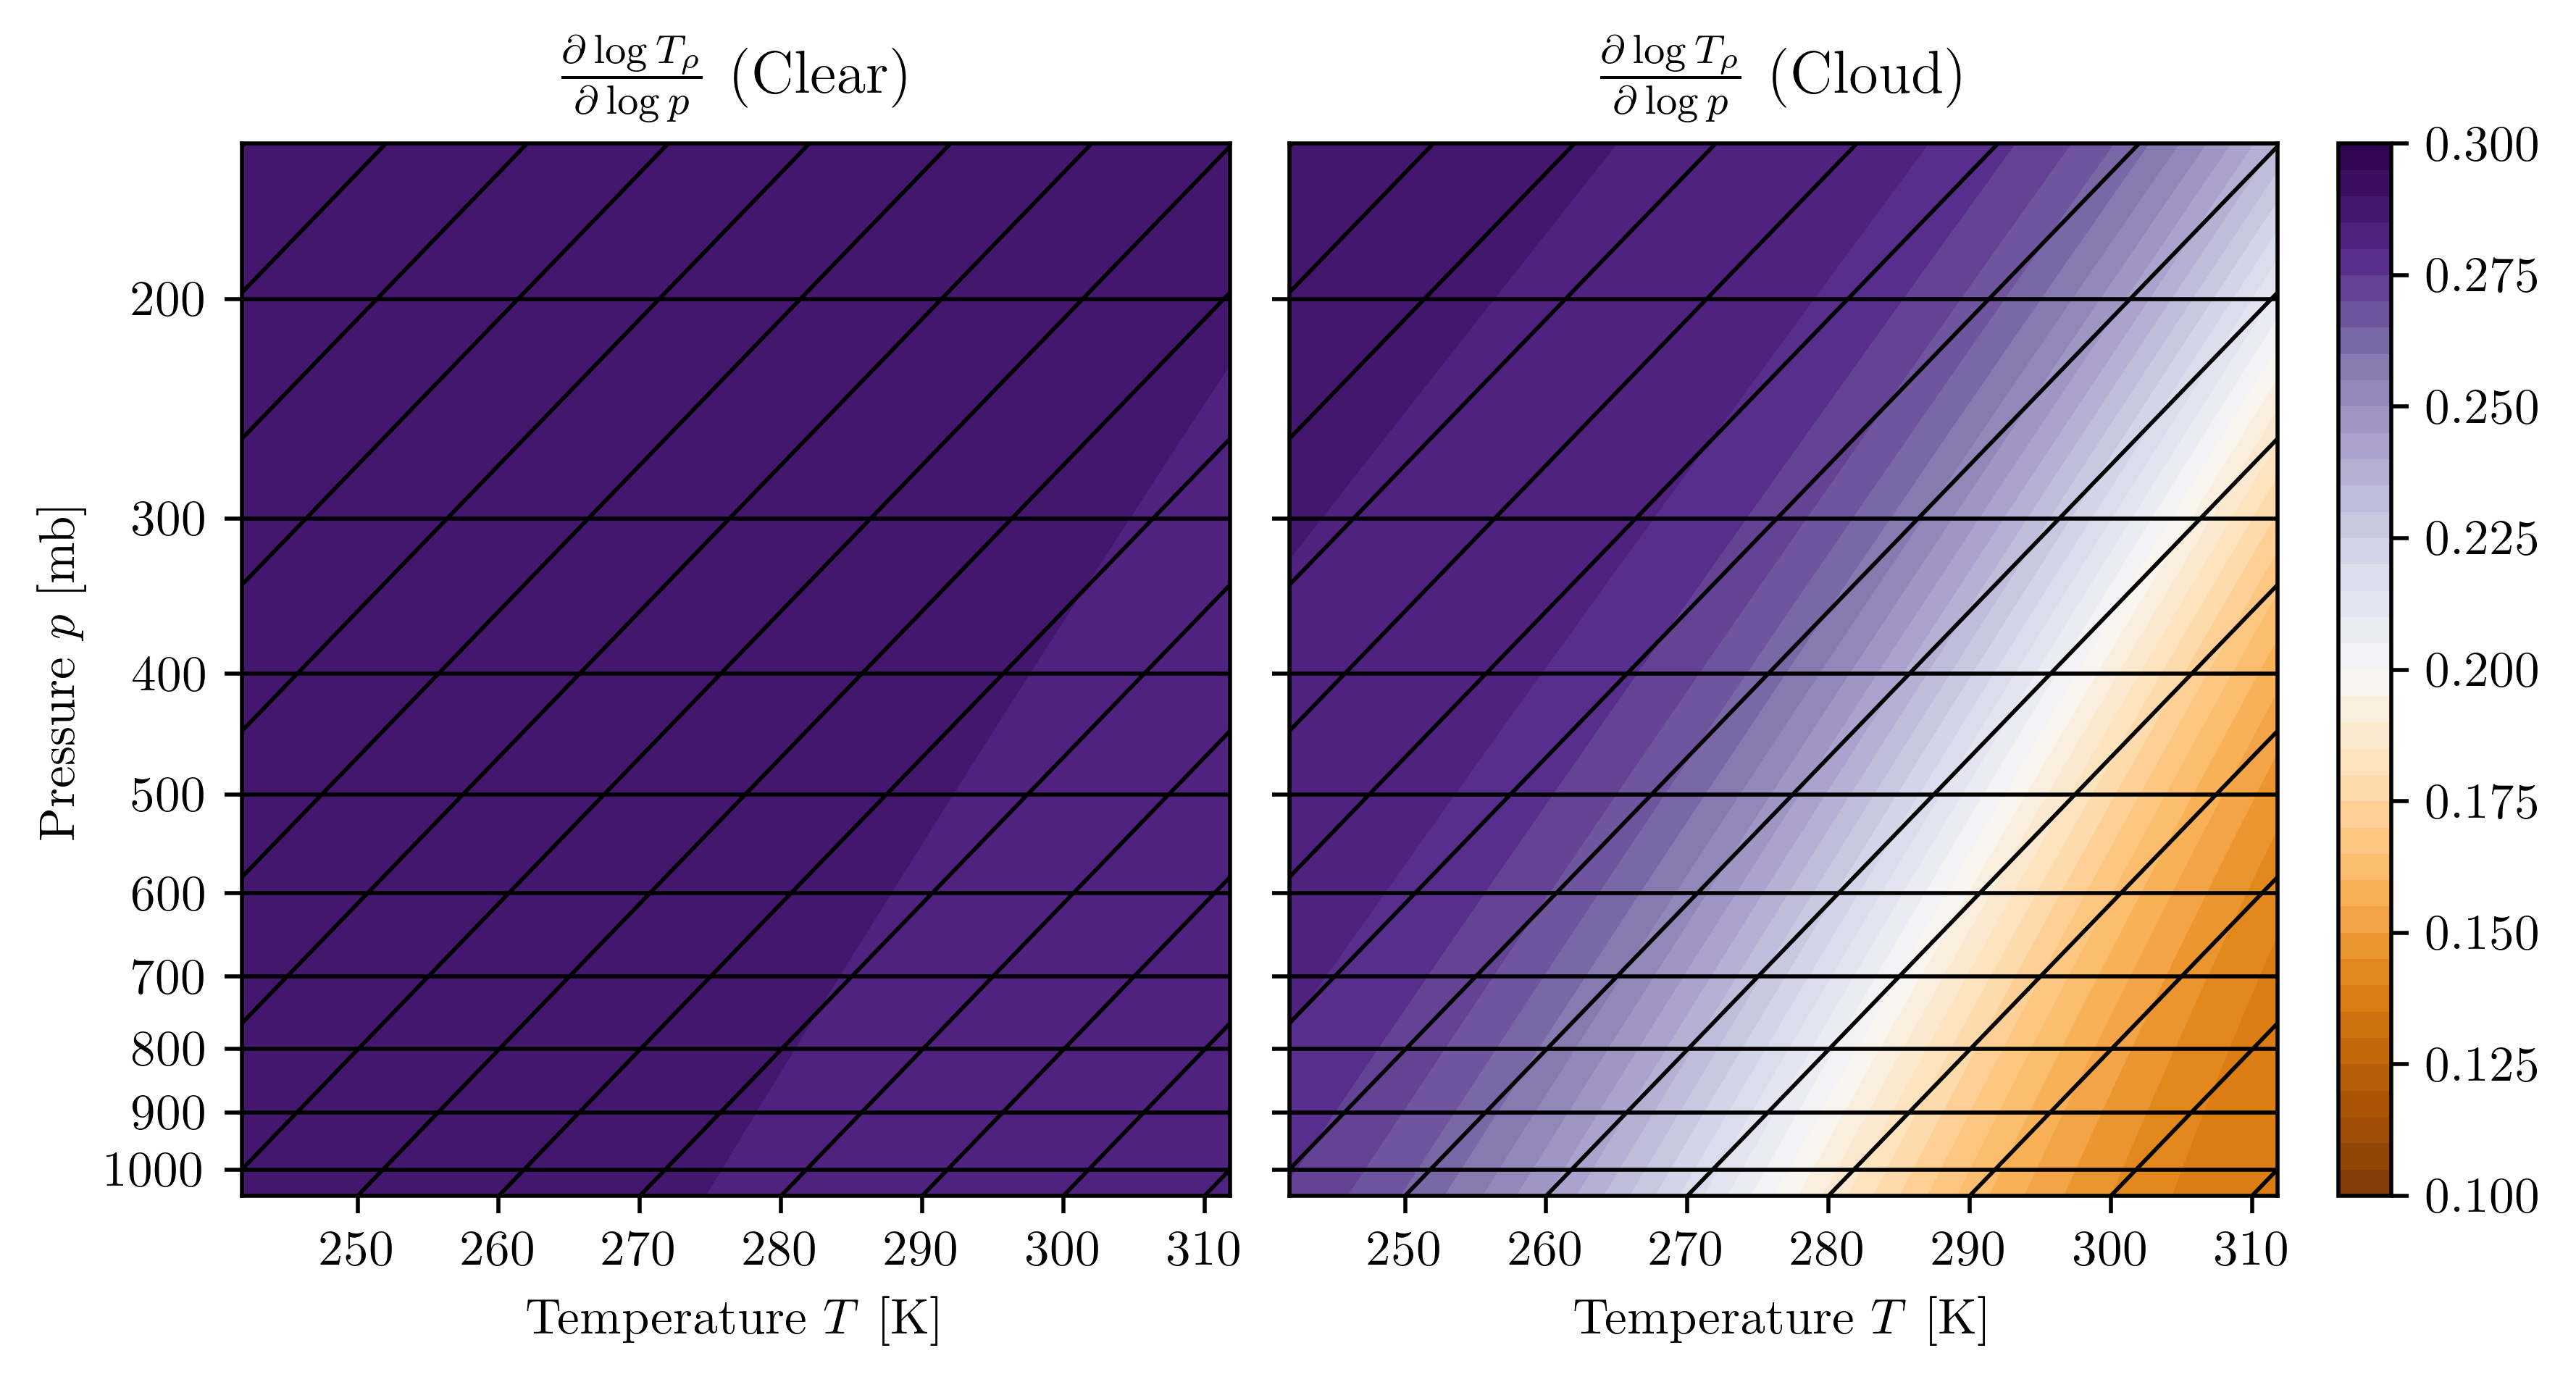

In [7]:
## dlog T_rho/ dlog p - plot

def dlogTrho_dlogp_clear(p, T):
    rs = rstar(p,T)
    return RT(rs)/cpT(rs)

def dlogTrho_dlogp_cloud(p, T):
    rs = rstar(p,T)
    drl_dlogp = -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(RT(rs)/cpT(rs)*lambda_R(T)-1)
    return RT(rs)/cpT(rs) + drl_dlogp*(lambda_c(T,rs)-Rv/RT(rs))

fig, axes = plt.subplots(layout='constrained', ncols=2, sharey=True)
fig.set_size_inches(7,3.7)
fig.set_dpi(500)

axes[0].set_ylim(np.log(p_bot), np.log(p_top))
axes[0].set_ylabel(r'Pressure $p$ [mb]')

# The x-axis will be the skewed temperature coordinate.
axes[0].set_xlim(Tmin, Tmax)
axes[1].set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    axes[0].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[1].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

axes[0].set_yticks(np.log(iso_p_levels))
axes[0].set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    axes[0].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[1].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)

axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[0].set_xlabel(r"Temperature $T$ [K]")

axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[1].set_xlabel(r"Temperature $T$ [K]")

axes[0].set_title(r'$\frac{\partial \log T_\rho}{\partial \log p}$ (Clear)', pad=10)
axes[1].set_title(r'$\frac{\partial \log T_\rho}{\partial \log p}$ (Cloud)', pad=10)
#ax.tick_params(axis="x", bottom=False)

axes[0].grid(False)
axes[1].grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

axes[0].contourf(       xx, np.log(pp), dlogTrho_dlogp_clear(pp*100, TT), cmap='PuOr', levels=np.arange(0.1,0.305,0.005))
cont = axes[1].contourf(xx, np.log(pp), dlogTrho_dlogp_cloud(pp*100, TT), cmap='PuOr', levels=np.arange(0.1,0.305,0.005))
fig.colorbar(cont, ticks=[j for j in np.arange(0.1,0.31,0.025)])

print(np.max(dlogTrho_dlogp_cloud(pp*100, TT)))
print(np.min(dlogTrho_dlogp_cloud(pp*100, TT)))

print(np.max(dlogTrho_dlogp_clear(pp*100, TT)))
print(np.min(dlogTrho_dlogp_clear(pp*100, TT)))

plt.show()

Figure 2.4 (Presentation version)

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
0.28528358643762225
0.135063454546319
0.2852882663956179
0.2824022991675147


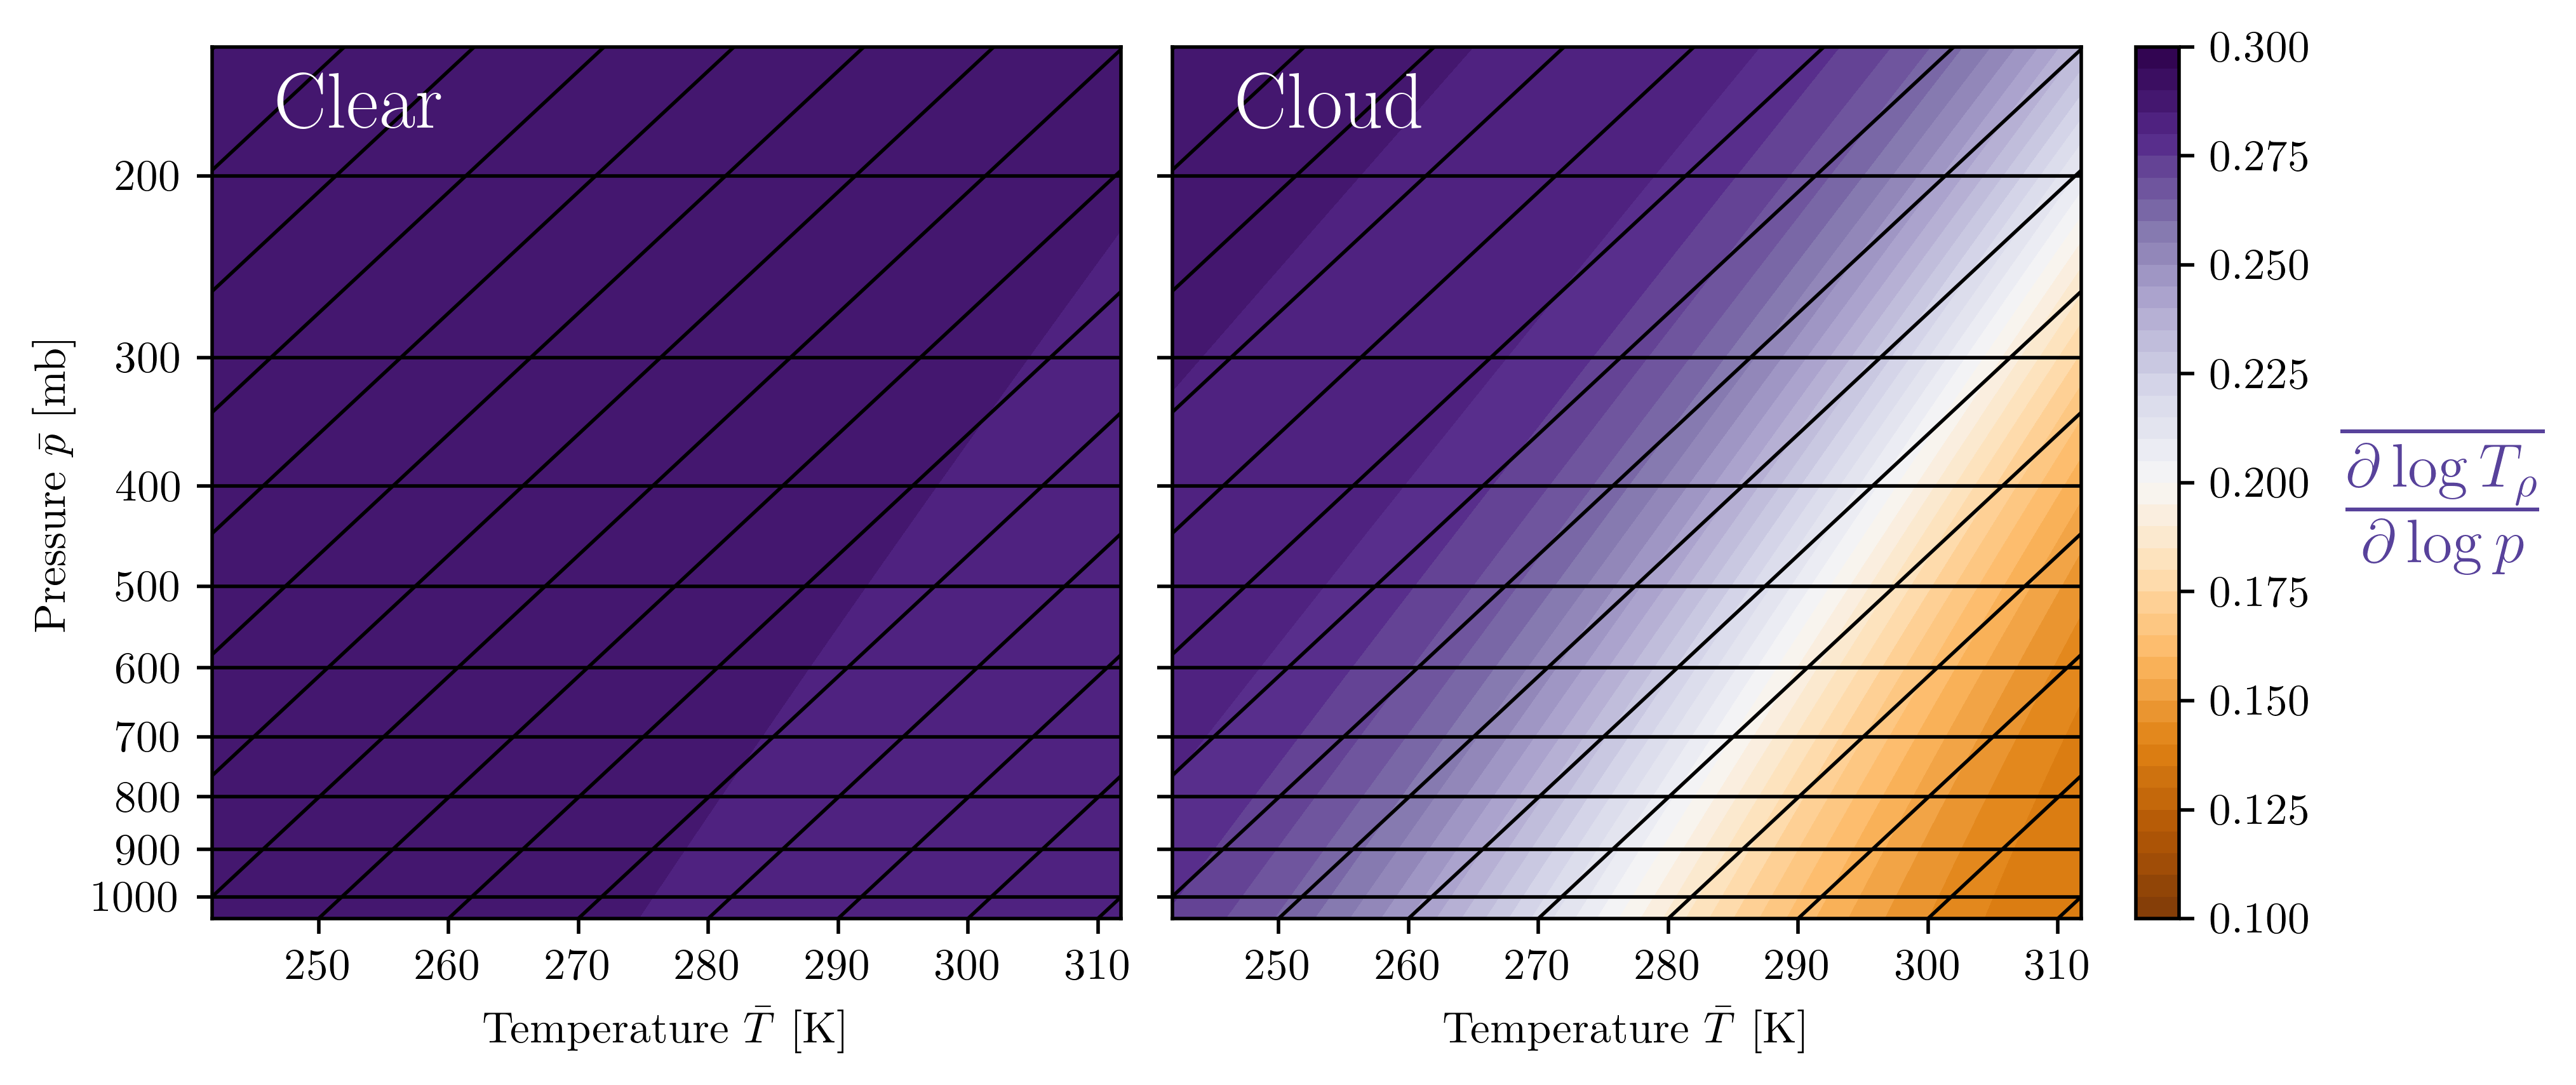

In [8]:
## dlog T_rho/ dlog p - plot
##
## Presentation version
##

def dlogTrho_dlogp_clear(p, T):
    rs = rstar(p,T)
    return RT(rs)/cpT(rs)

def dlogTrho_dlogp_cloud(p, T):
    rs = rstar(p,T)
    drl_dlogp = -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(RT(rs)/cpT(rs)*lambda_R(T)-1)
    return RT(rs)/cpT(rs) + drl_dlogp*(lambda_c(T,rs)-Rv/RT(rs))

fig, axes = plt.subplots(layout='constrained', ncols=2, sharey=True)
fig.set_size_inches(8.,3.3)
fig.set_dpi(500)

axes[0].set_ylim(np.log(p_bot), np.log(p_top))
axes[0].set_ylabel(r'Pressure $\bar{p}$ [mb]')

# The x-axis will be the skewed temperature coordinate.
axes[0].set_xlim(Tmin, Tmax)
axes[1].set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    axes[0].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[1].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

axes[0].set_yticks(np.log(iso_p_levels))
axes[0].set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    axes[0].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[1].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)

axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[0].set_xlabel(r"Temperature $\bar{T}$ [K]")

axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[1].set_xlabel(r"Temperature $\bar{T}$ [K]")

#axes[0].set_title(r'$\frac{\partial \log T_\rho}{\partial \log p}$ (Clear)', pad=10)
#axes[1].set_title(r'$\frac{\partial \log T_\rho}{\partial \log p}$ (Cloud)', pad=10)
#ax.tick_params(axis="x", bottom=False)

axes[0].grid(False)
axes[1].grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

axes[0].contourf(       xx, np.log(pp), dlogTrho_dlogp_clear(pp*100, TT), 
                        cmap='PuOr', levels=np.arange(0.1,0.305,0.005))
cont = axes[1].contourf(xx, np.log(pp), dlogTrho_dlogp_cloud(pp*100, TT), 
                        cmap='PuOr', levels=np.arange(0.1,0.305,0.005))
cbar = fig.colorbar(cont, ticks=[j for j in np.arange(0.1,0.31,0.025)])
#cbar.set_label(r'$\frac{\partial \log T_\rho}{\partial \log p}$', size=16)
cbar.ax.set_ylabel(r'$\overline{\frac{\partial \log T_\rho}{\partial \log p}}$', 
                   rotation=0, labelpad=30, size=20, 
                   color='#58429B', y=0.56)

print(np.max(dlogTrho_dlogp_cloud(pp*100, TT)))
print(np.min(dlogTrho_dlogp_cloud(pp*100, TT)))

print(np.max(dlogTrho_dlogp_clear(pp*100, TT)))
print(np.min(dlogTrho_dlogp_clear(pp*100, TT)))

axes[0].annotate('Clear', (245, np.log(180)), color='white', size=18, zorder=6)
axes[1].annotate('Cloud', (245, np.log(180)), color='white', size=18, zorder=6)

plt.show()

Figure 2.5

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
0.9999813273878732
0.30499097501579275
1.0
1.0
0.05977180772673911
6.885075078461788e-07
0.023606399988549985
4.138897846272812e-08


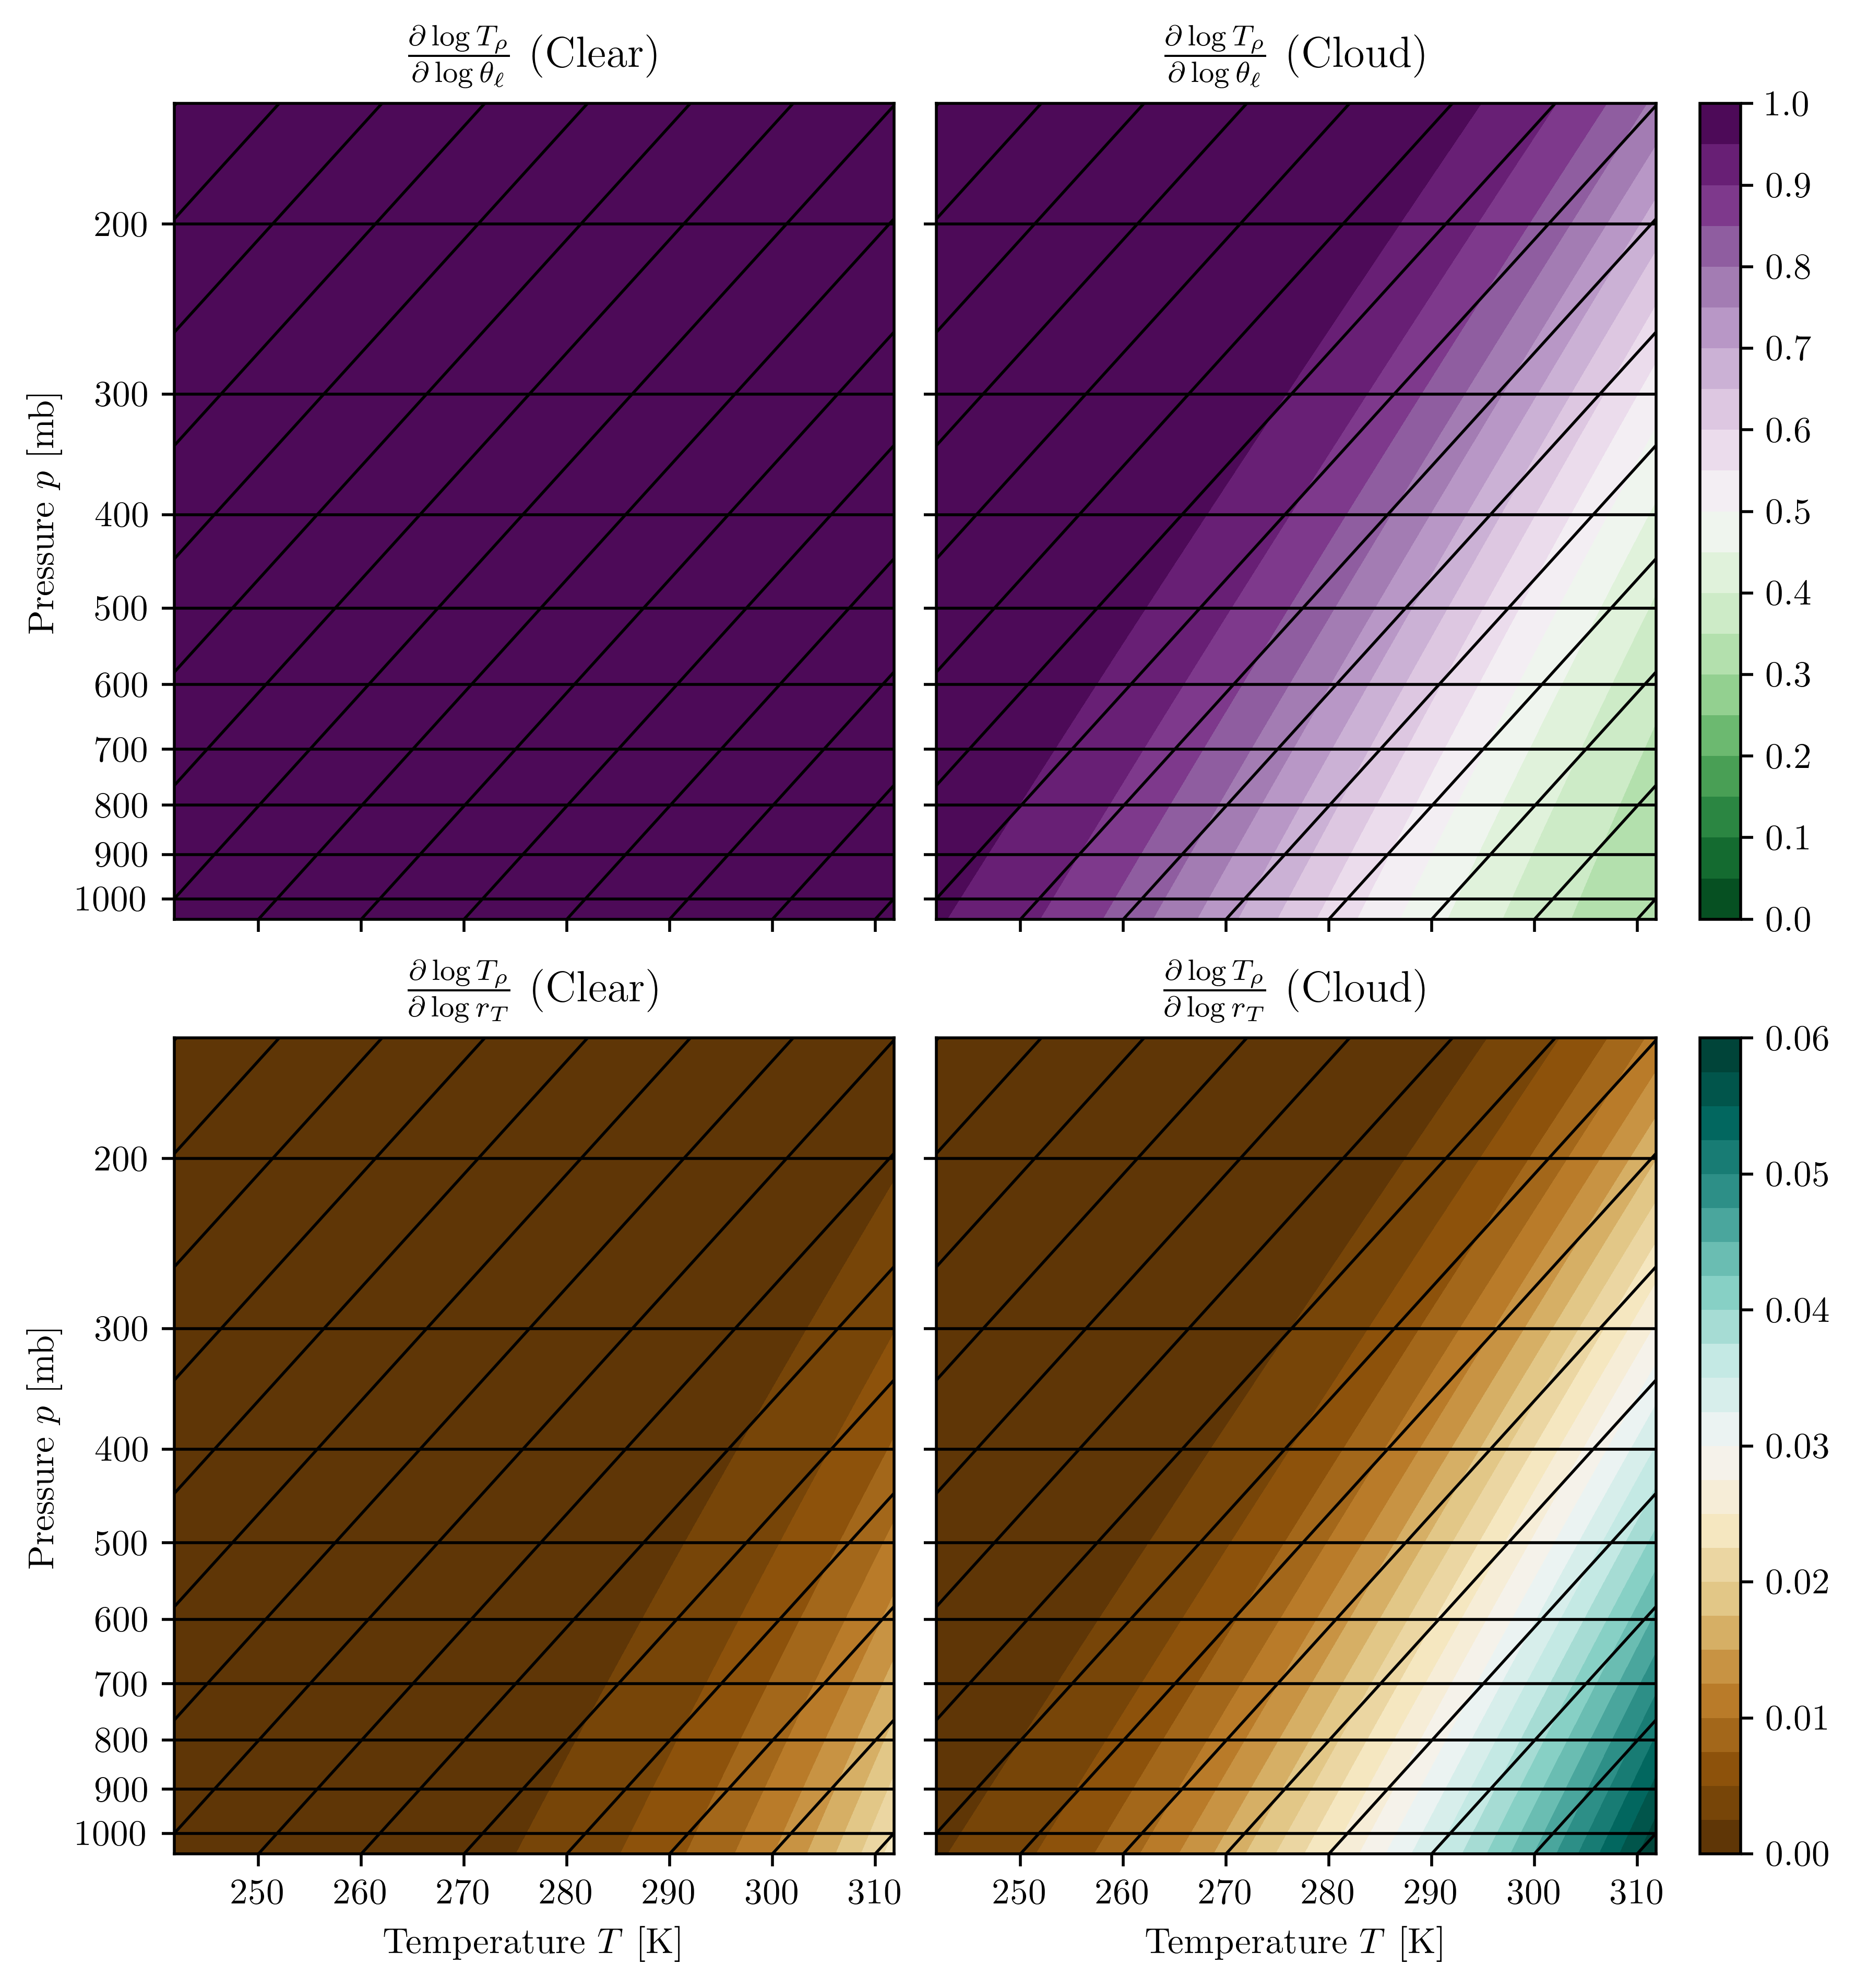

In [9]:
## dlog T_rho/ dlog thl AND dlog T_rho/ dlog rT - plot

def dlogTrho_dlogthl_clear(p, T):
    rs = rstar(p,T)
    return np.ones_like(pp)

def dlogTrho_dlogthl_cloud(p, T):
    rs = rstar(p,T)
    drl_dlogthl = -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*lambda_R(T)*RT(rs)/Rd
    return 1 + drl_dlogthl*(lambda_c(T,rs)-Rv/RT(rs))

def dlogTrho_dlogrT_clear(p, T):
    rs = rstar(p,T)
    return (Rv-Rd)/RT(rs)*rs/(1+rs) + (Rv*cpd - cpv*Rd)/cpT(rs)**2*rs*np.log(p/p00)

def dlogTrho_dlogrT_cloud(p, T):
    rs = rstar(p,T)
    drl_dlogrT = rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(1 - lambda_R(T)*RT(rs)/Rd*(Rv*cpd - cpv*Rd)/cpT(rs)**2*rs*np.log(p/p00))
    return (Rv-Rd)/RT(rs)*rs/(1+rs) + (Rv*cpd - cpv*Rd)/cpT(rs)**2*rs*np.log(p/p00) + drl_dlogrT*(lambda_c(T,rs)-Rv/RT(rs))

fig, axes = plt.subplots(layout='constrained', ncols=2, nrows=2, sharey=True, sharex=True)
fig.set_size_inches(7,7.5)
fig.set_dpi(500)

axes[0,0].set_ylim(np.log(p_bot), np.log(p_top))
axes[0,0].set_ylabel(r'Pressure $p$ [mb]')

axes[1,0].set_ylim(np.log(p_bot), np.log(p_top))
axes[1,0].set_ylabel(r'Pressure $p$ [mb]')

# The x-axis will be the skewed temperature coordinate.
axes[0,0].set_xlim(Tmin, Tmax)
axes[0,1].set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    axes[0,0].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[0,1].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[1,0].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)
    axes[1,1].hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

axes[0,0].set_yticks(np.log(iso_p_levels))
axes[0,0].set_yticklabels([f"{int(p)}" for p in iso_p_levels])
axes[1,0].set_yticks(np.log(iso_p_levels))
axes[1,0].set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    axes[0,0].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[0,1].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[1,0].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)
    axes[1,1].plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)

axes[1,0].set_xticks(x_ticks)
axes[1,0].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[1,0].set_xlabel(r"Temperature $T$ [K]")

axes[1,1].set_xticks(x_ticks)
axes[1,1].set_xticklabels([f"{int(T)}" for T in T_ticks])
axes[1,1].set_xlabel(r"Temperature $T$ [K]")

axes[0,0].set_title(r'$\frac{\partial \log T_\rho}{\partial \log \theta_{\scriptscriptstyle \ell}}$ (Clear)', pad=10)
axes[0,1].set_title(r'$\frac{\partial \log T_\rho}{\partial \log \theta_{\scriptscriptstyle \ell}}$ (Cloud)', pad=10)
axes[1,0].set_title(r'$\frac{\partial \log T_\rho}{\partial \log r_{\scriptscriptstyle T}}$ (Clear)', pad=10)
axes[1,1].set_title(r'$\frac{\partial \log T_\rho}{\partial \log r_{\scriptscriptstyle T}}$ (Cloud)', pad=10)
#ax.tick_params(axis="x", bottom=False)

axes[0,0].grid(False)
axes[0,1].grid(False)
axes[1,0].grid(False)
axes[1,1].grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

axes[0,0].contourf(          xx, np.log(pp), dlogTrho_dlogthl_clear(pp*100, TT), cmap='PRGn_r', levels=np.arange(0.,1.05,0.05))
contthl = axes[0,1].contourf(xx, np.log(pp), dlogTrho_dlogthl_cloud(pp*100, TT), cmap='PRGn_r', levels=np.arange(0.,1.05,0.05))
fig.colorbar(contthl, ticks=[j for j in np.arange(0.0,1.05,0.1)])

axes[1,0].contourf(         xx, np.log(pp), dlogTrho_dlogrT_clear(pp*100, TT), cmap='BrBG', levels=np.arange(0.,0.061,0.0025))
contrT = axes[1,1].contourf(xx, np.log(pp), dlogTrho_dlogrT_cloud(pp*100, TT), cmap='BrBG', levels=np.arange(0.,0.061,0.0025))
fig.colorbar(contrT, ticks=[j for j in np.arange(0.0,0.061,0.01)])

print(np.max(dlogTrho_dlogthl_cloud(pp*100, TT)))
print(np.min(dlogTrho_dlogthl_cloud(pp*100, TT)))

print(np.max(dlogTrho_dlogthl_clear(pp*100, TT)))
print(np.min(dlogTrho_dlogthl_clear(pp*100, TT)))

print(np.max(dlogTrho_dlogrT_cloud(pp*100, TT)))
print(np.min(dlogTrho_dlogrT_cloud(pp*100, TT)))

print(np.max(dlogTrho_dlogrT_clear(pp*100, TT)))
print(np.min(dlogTrho_dlogrT_clear(pp*100, TT)))

plt.show()

Figure 2.7

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
-4.024335320412519e-07
-0.024007224163766223


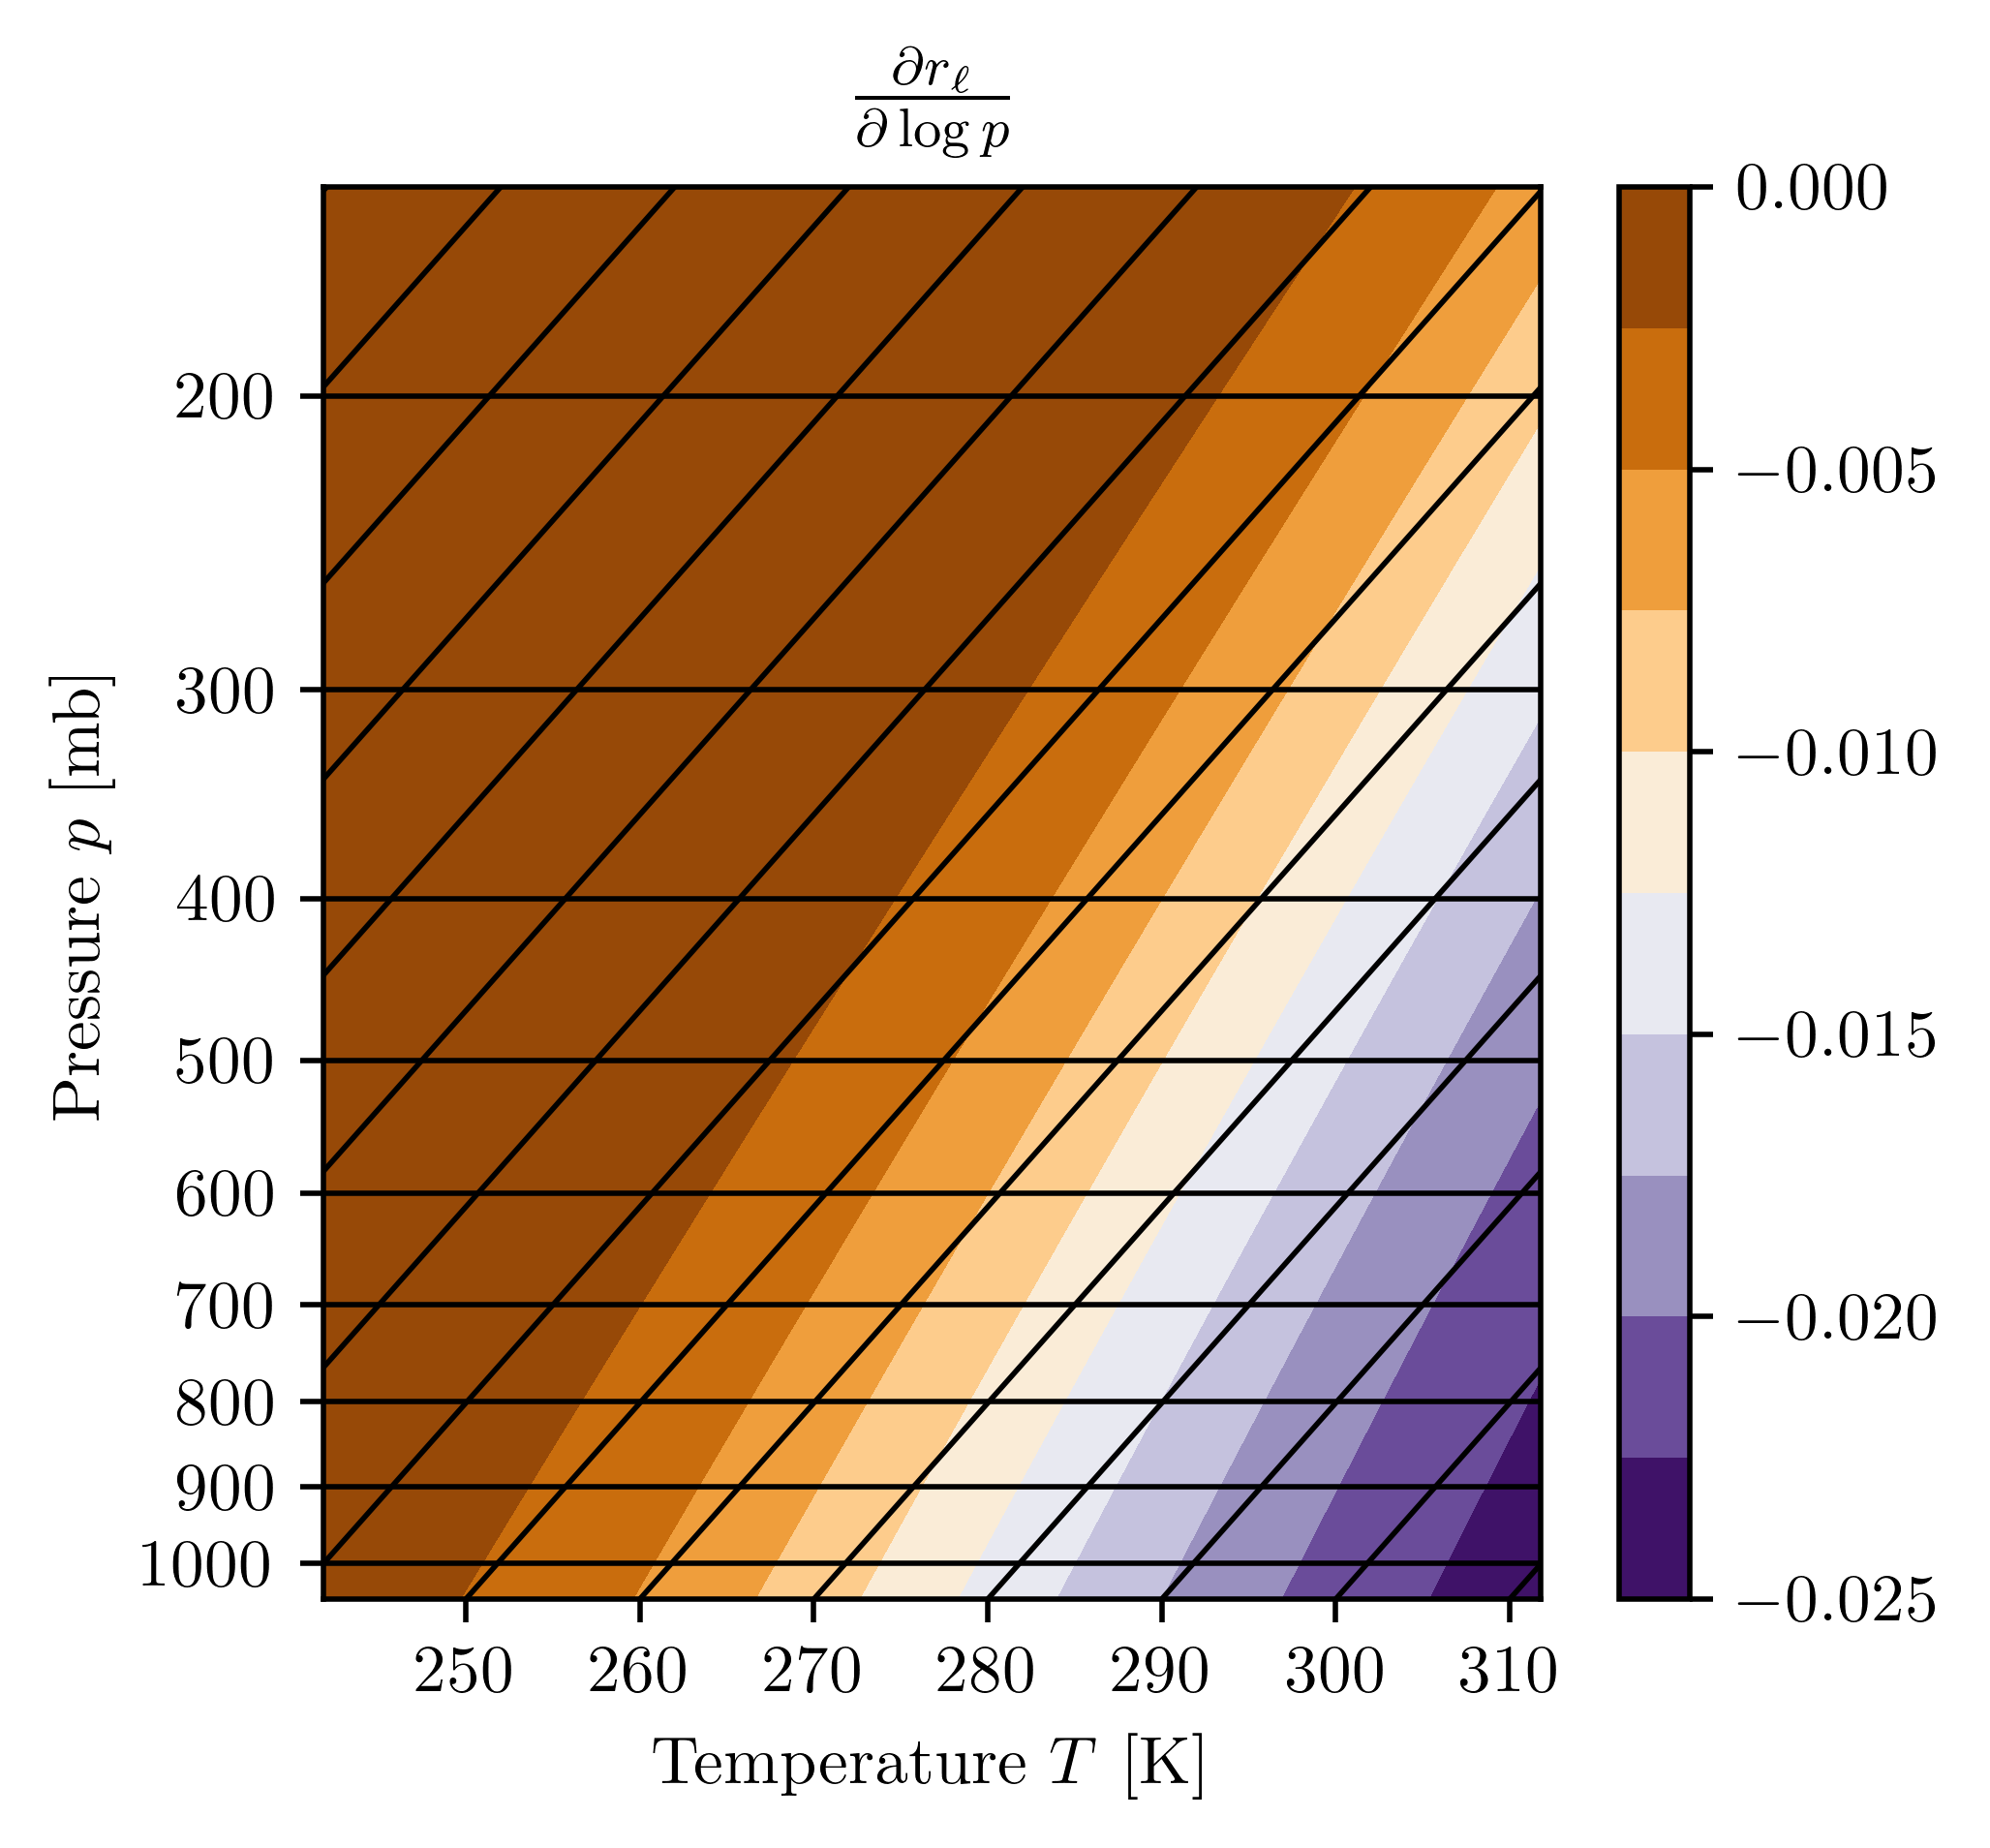

In [10]:
## dlog rl/ dlog p - plot

def dlogrl_dlogp_cloud(p, T):
    rs = rstar(p,T)
    return -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(RT(rs)/cpT(rs)*lambda_R(T)-1)

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(4,3.7)
fig.set_dpi(500)

ax.set_ylim(np.log(p_bot), np.log(p_top))
ax.set_ylabel(r'Pressure $p$ [mb]')

# The x-axis will be the skewed temperature coordinate.
ax.set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    ax.hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

ax.set_yticks(np.log(iso_p_levels))
ax.set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    ax.plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{int(T)}" for T in T_ticks])
ax.set_xlabel(r"Temperature $T$ [K]")
ax.set_title(r'Skew-T Diagram of $\log_{10} r^*(T,p)$')
#ax.tick_params(axis="x", bottom=False)

ax.grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

ax.set_title(r'$\frac{\partial r_{\scriptscriptstyle \ell}}{\partial \log p}$', pad=10)
cont = ax.contourf(xx, np.log(pp), dlogrl_dlogp_cloud(pp*100, TT), cmap='PuOr_r', levels=np.arange(-0.025,0.001,0.0025))
fig.colorbar(cont, ticks=[j for j in np.arange(-0.025,0.001,0.005)])

print(np.max(dlogrl_dlogp_cloud(pp*100, TT)))
print(np.min(dlogrl_dlogp_cloud(pp*100, TT)))

plt.show()

Figure 2.7 (Presentation Version)

[308.19476393 298.19476393 288.19476393 278.19476393 268.19476393
 258.19476393 248.19476393]
278.25631139862577
270.0
-4.024335320412519e-07
-0.024007224163766223


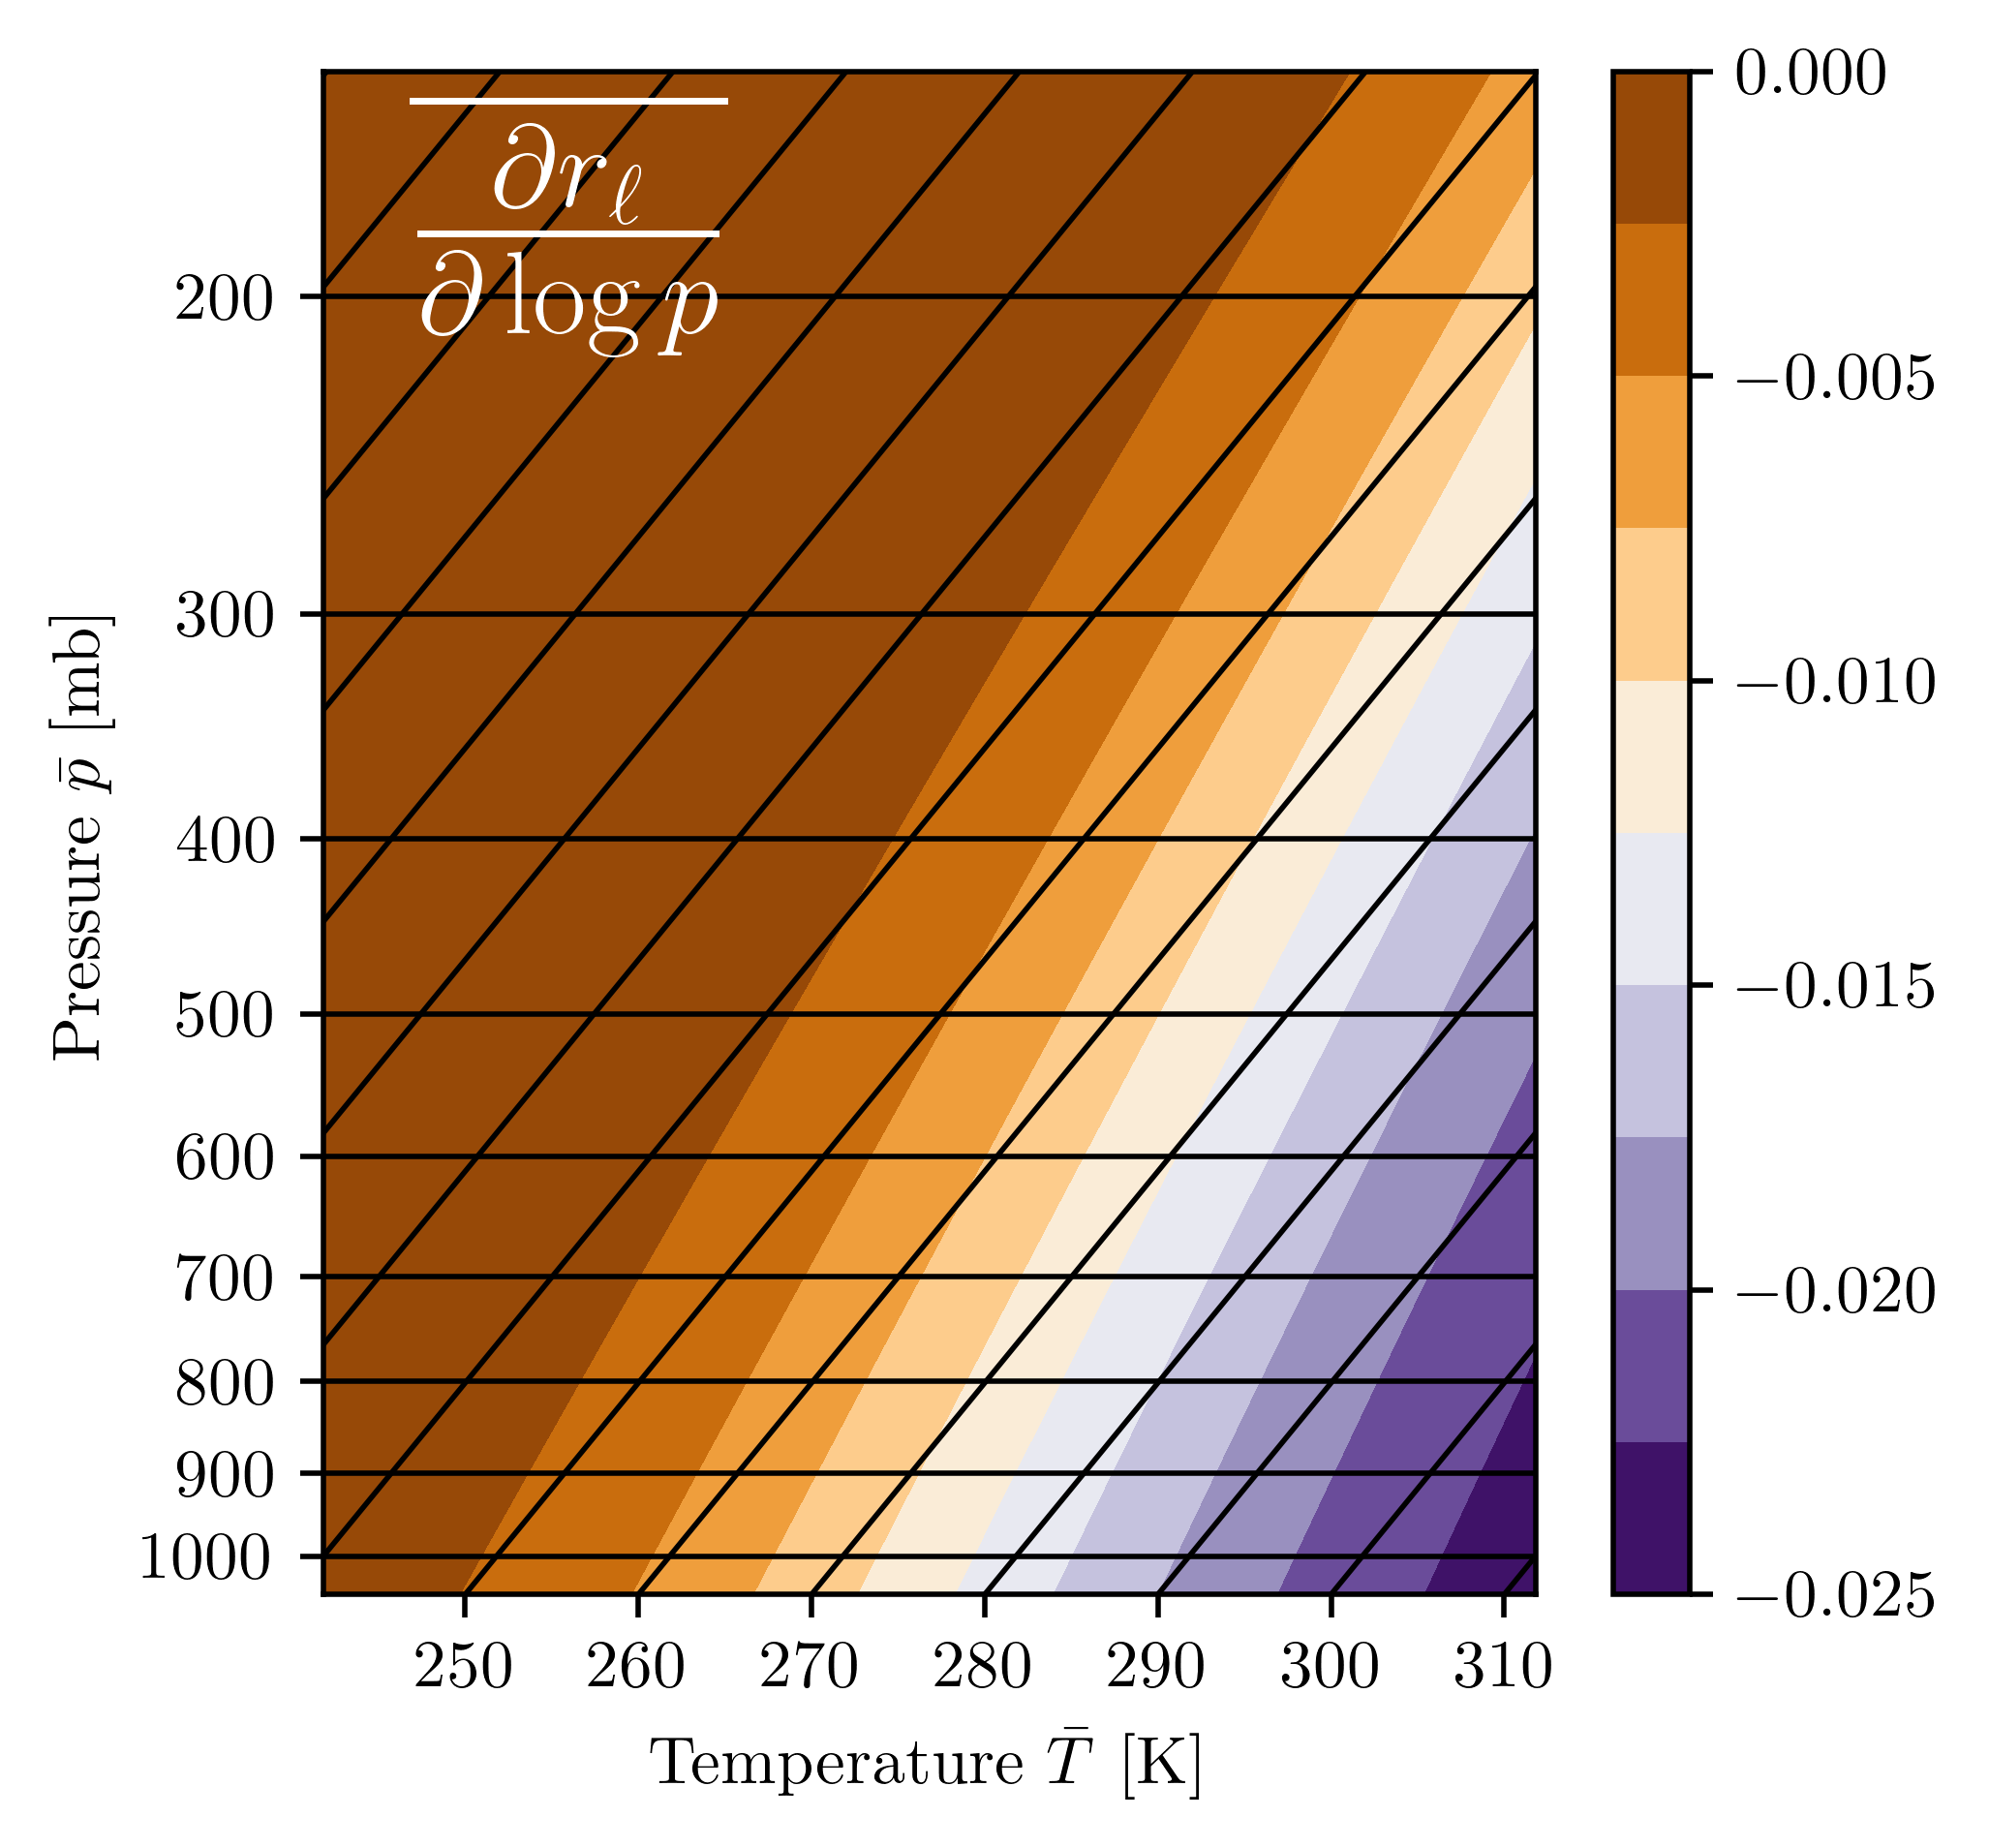

In [11]:
## dlog rl/ dlog p - plot
##
## Presentation version
##

def dlogrl_dlogp_cloud(p, T):
    rs = rstar(p,T)
    return -rs/(1+lambda_c(T,rs)*lambda_R(T)*RT(rs)/Rd*rs)*(RT(rs)/cpT(rs)*lambda_R(T)-1)

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(4,3.7)
fig.set_dpi(500)

ax.set_ylim(np.log(p_bot), np.log(p_top))
ax.set_ylabel(r'Pressure $\bar{p}$ [mb]')

# The x-axis will be the skewed temperature coordinate.
ax.set_xlim(Tmin, Tmax)

# ----------------------------
# Grid: isobars (horizontal) and isotherms (diagonal)
# ----------------------------
# Isobars
iso_p_levels = np.arange(1000., 100., -100)
for p in iso_p_levels:
    ax.hlines(np.log(p), Tmin, Tmax, linewidth=0.8, linestyle='-', color='k', zorder=5)

ax.set_yticks(np.log(iso_p_levels))
ax.set_yticklabels([f"{int(p)}" for p in iso_p_levels])

# Isotherms (straight lines in skew coordinates)
p_line = np.linspace(p_bot, p_top, 200)
for T in np.arange(Tmax, T_from_xp(Tmin - 0.1, p_top), -dT_iso):
    x_line = x_from_Tp(T, p_line)
    ax.plot(x_line, np.log(p_line), color='k', linewidth=0.8, zorder=5)

# ----------------------------
# Bottom temperature labels (at p = p0)
# ----------------------------
# Place x-ticks at positions corresponding to integer multiples of dT_iso at p0
T_ticks = np.arange(Tmax, Tmin, -dT_iso)
x_ticks = x_from_Tp(T_ticks, p_bot)
print(x_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{int(T)}" for T in T_ticks])
ax.set_xlabel(r"Temperature $\bar{T}$ [K]")
#ax.set_title(r'Skew-T Diagram of $\log_{10} r^*(T,p)$')
#ax.tick_params(axis="x", bottom=False)

ax.grid(False)

# ----------------------------
# Example: converting between coordinates
# ----------------------------
# Suppose you have a plot coordinate (x*, p*), recover T:
x_star = x_from_Tp(270.0, 800.0)
print(x_star)
p_star = 800.0
T_star = T_from_xp(x_star, p_star)
print(T_star)
#ax.plot(x_star, np.log(p_star), 'k.')

xx, pp = np.meshgrid(np.linspace(Tmin, Tmax, num=250),
                     np.linspace(p_bot, p_top, num=250))
TT = T_from_xp(xx, pp)

#ax.set_title(r'$\frac{\partial r_{\scriptscriptstyle \ell}}{\partial \log p}$', pad=10)
cont = ax.contourf(xx, np.log(pp), dlogrl_dlogp_cloud(pp*100, TT), cmap='PuOr_r', levels=np.arange(-0.025,0.001,0.0025))
fig.colorbar(cont, ticks=[j for j in np.arange(-0.025,0.001,0.005)])

print(np.max(dlogrl_dlogp_cloud(pp*100, TT)))
print(np.min(dlogrl_dlogp_cloud(pp*100, TT)))

ax.annotate(r'$\overline{\frac{\partial r_{\scriptscriptstyle \ell}}{\partial \log p}}$', 
            (245, np.log(195)), color='white', size=25, zorder=6)

plt.show()